# Insurance Claims Assessment

### Problem Description

For this analysis project, you will act as a data analyst for an insurance company that offers several types of coverage, including Home, Health, and Property insurance. You have been assigned several tasks to complete including building an interactive dashboard for use by management. In addition, you should conduct your own exploratory data analysis and note any useful insights.

### Approach

For the purpose of this project, we are analyzing three datasets:

1. Employee Data - this the master data of the employee ( a.k.a agents or adjusters ) working on the insurance claims
2. Vendor Data - this is the master data of the vendor who assist insurance company in investigating the claims
3. Claims Data - this is the claim level transaction details submitted by customer to the insurance company for re-imbursement


## Dataset Profiling

Before working on the tasks, we'll load and profile the data.

In [1]:
# load libraries/packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import timedelta

pd.set_option("display.max.columns", None) # change max # of columns shown in output
pd.set_option('display.max_rows', 50) # change max # of rows shown in output

In [2]:
# read in csv files and create dataframes

vend = pd.read_csv('Data/vendor_data.csv')
emp = pd.read_csv('Data/employee_data.csv')
ins = pd.read_csv('Data/insurance_data.csv')

### Vendor Data

In [3]:
# view head of vendor data

vend.head()

VENDOR_ID              VENDOR_NAME                   ADDRESS_LINE1  \
0  VNDR00001  King, Proctor and Jones        2027 North Shannon Drive   
1  VNDR00002               Garcia Ltd          5701 East Shirley Lane   
2  VNDR00003               Cherry LLC            1217 Cottondale Road   
3  VNDR00004              Mays-Benson  227 West Montgomery Cross Road   
4  VNDR00005               Wilson PLC            23 North Hill Street   

  ADDRESS_LINE2          CITY STATE  POSTAL_CODE  
0            #5  Fayetteville    AR        72703  
1           NaN    Montgomery    AL        36117  
2           NaN    Montgomery    AL        36109  
3          #736      Savannah    GA        31406  
4           NaN     Nashville    TN        37210

In [4]:
# view info for vendor data

vend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VENDOR_ID      600 non-null    object
 1   VENDOR_NAME    600 non-null    object
 2   ADDRESS_LINE1  600 non-null    object
 3   ADDRESS_LINE2  97 non-null     object
 4   CITY           594 non-null    object
 5   STATE          600 non-null    object
 6   POSTAL_CODE    600 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 32.9+ KB


In [5]:
# view number of nulls for each column

vend.isnull().sum()

VENDOR_ID          0
VENDOR_NAME        0
ADDRESS_LINE1      0
ADDRESS_LINE2    503
CITY               6
STATE              0
POSTAL_CODE        0
dtype: int64

**The vendor data contains 7 columns and 600 rows. There are 503 null values in the ADDRESS_LINE2 column, and 6 null values in the CITY column. Since ADDRESS_LINE2 is not necessary for a valid address we will replace the nulls with an empty string.**

In [6]:
vend['ADDRESS_LINE2'].fillna("", inplace=True)

In [7]:
# rechecking null values
vend.isnull().sum()

VENDOR_ID        0
VENDOR_NAME      0
ADDRESS_LINE1    0
ADDRESS_LINE2    0
CITY             6
STATE            0
POSTAL_CODE      0
dtype: int64

**Now we will view the rows that have null values in the CITY column.**

In [8]:
vend[vend['CITY'].isna()]

VENDOR_ID                     VENDOR_NAME           ADDRESS_LINE1  \
34   VNDR00035                     Dixon Group  841 Whittier Hill Road   
123  VNDR00124                   Taylor-Bailey        1209 Meehan Road   
141  VNDR00142                      Rice-Perry  841 Whittier Hill Road   
361  VNDR00362  Andersen, Davis and Washington             68 Route 66   
409  VNDR00410                   Fleming Group          71 Racine Road   
515  VNDR00516                     Brown-Blake          8 Watkins Road   

    ADDRESS_LINE2 CITY STATE  POSTAL_CODE  
34                 NaN    VT         5647  
123                NaN    VT         5443  
141                NaN    VT         5647  
361                NaN    VT         5149  
409                NaN    VT         5468  
515                NaN    VT         5468

**A google search shows that based on the POSTAL_CODE, the missing city names are:**

**05647: Cabot**

**05443: Bristol**

**05149: Ludlow**

**05468: Milton**

**Now we will fill the null values w/the city names that we looked up.**

In [9]:
vend.loc[(vend['POSTAL_CODE'] == 5647) & (vend['CITY'].isnull()), 'CITY'] = 'Cabot'
vend.loc[(vend['POSTAL_CODE'] == 5443) & (vend['CITY'].isnull()), 'CITY'] = 'Bristol'
vend.loc[(vend['POSTAL_CODE'] == 5149) & (vend['CITY'].isnull()), 'CITY'] = 'Ludlow'
vend.loc[(vend['POSTAL_CODE'] == 5468) & (vend['CITY'].isnull()), 'CITY'] = 'Milton'

# rechecking null values
vend.isnull().sum()

VENDOR_ID        0
VENDOR_NAME      0
ADDRESS_LINE1    0
ADDRESS_LINE2    0
CITY             0
STATE            0
POSTAL_CODE      0
dtype: int64

**The vendor data is now clean with no missing values. Now we will view the employee data.**

### Employee Data

In [10]:
# view head of employee data

emp.head()

AGENT_ID      AGENT_NAME DATE_OF_JOINING          ADDRESS_LINE1  \
0  AGENT00001       Ray Johns      1993-06-05       1402 Maggies Way   
1  AGENT00002   Angelo Borjon      2005-12-27         414 Tanya Pass   
2  AGENT00003  Candy Spellman      2003-09-02    606 National Street   
3  AGENT00004      Mary Smith      2004-09-23  235 Hugh Thomas Drive   
4  AGENT00005    Mildred Diaz      2011-06-21  3426 Broadview Street   

  ADDRESS_LINE2              CITY STATE  POSTAL_CODE  EMP_ROUTING_NUMBER  \
0           NaN  Waterbury Center    VT         5677            34584958   
1           NaN       Panama City    FL        32404           107363763   
2          #306      Fayetteville    AR        72701            81744097   
3           NaN       Panama City    FL        32404            67563771   
4           NaN        Montgomery    AL        36110           114951317   

      EMP_ACCT_NUMBER  
0  HKUN51252328472585  
1  OPIS19290040088204  
2  YSCJ67489688482590  
3  ZANG21285355574581  
4  DZFS82244494451134

In [11]:
# view employee data info

emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AGENT_ID            1200 non-null   object
 1   AGENT_NAME          1200 non-null   object
 2   DATE_OF_JOINING     1200 non-null   object
 3   ADDRESS_LINE1       1200 non-null   object
 4   ADDRESS_LINE2       179 non-null    object
 5   CITY                1193 non-null   object
 6   STATE               1200 non-null   object
 7   POSTAL_CODE         1200 non-null   int64 
 8   EMP_ROUTING_NUMBER  1200 non-null   int64 
 9   EMP_ACCT_NUMBER     1200 non-null   object
dtypes: int64(2), object(8)
memory usage: 93.9+ KB


In [12]:
# view number of nulls for each column

emp.isnull().sum()

AGENT_ID                 0
AGENT_NAME               0
DATE_OF_JOINING          0
ADDRESS_LINE1            0
ADDRESS_LINE2         1021
CITY                     7
STATE                    0
POSTAL_CODE              0
EMP_ROUTING_NUMBER       0
EMP_ACCT_NUMBER          0
dtype: int64

**The employee data contains 10 columns and 1200 rows. There are 1,021 null values in the ADDRESS_LINE2 column, and 7 null values in the CITY column. Just as we did with the vendor data, we will replace the nulls with an empty string.**

In [13]:
emp['ADDRESS_LINE2'].fillna("", inplace=True)

# rechecking null values
emp.isnull().sum()

AGENT_ID              0
AGENT_NAME            0
DATE_OF_JOINING       0
ADDRESS_LINE1         0
ADDRESS_LINE2         0
CITY                  7
STATE                 0
POSTAL_CODE           0
EMP_ROUTING_NUMBER    0
EMP_ACCT_NUMBER       0
dtype: int64

**Now we will view the rows that have null values in the CITY column.**

In [14]:
emp[emp['CITY'].isna()]

AGENT_ID         AGENT_NAME DATE_OF_JOINING    ADDRESS_LINE1  \
22   AGENT00023         Amy Venice      2009-12-11   386 Pratt Road   
140  AGENT00141         Mike Cress      2003-04-18   71 Racine Road   
268  AGENT00269   Lorraine Johnson      2011-09-27  114 Middle Road   
411  AGENT00412       Sondra Roder      2000-02-15   386 Pratt Road   
646  AGENT00647  Jefferson Tadlock      2006-07-19  16 Clark Street   
720  AGENT00721      Martin Murphy      2016-01-31   942 Lewis Road   
954  AGENT00955      Bryan Dondero      2011-11-22   386 Pratt Road   

    ADDRESS_LINE2 CITY STATE  POSTAL_CODE  EMP_ROUTING_NUMBER  \
22                 NaN    VT         5033            50361922   
140                NaN    VT         5468           112803894   
268                NaN    VT         5488            51708474   
411                NaN    VT         5033            98786378   
646                NaN    VT         5150           107067629   
720                NaN    CA        95076           110198860   
954                NaN    VT         5033           129325404   

        EMP_ACCT_NUMBER  
22   AQEJ74503862345483  
140  YAMO72600055800315  
268  RVWP11210385537621  
411  IBRI20475606365976  
646  OGSV96527095278678  
720  KNFN24040900286563  
954  XFVS57996633902953

**A google search shows that based on the POSTAL_CODE, the missing city names are:**

**05033: Bradford**

**05468: Milton**

**05488: Swanton**

**05150: North Springfield**

**95076: Royal Oaks**

**Now we will fill the null values w/the city names that we looked up.**

In [15]:
emp.loc[(emp['POSTAL_CODE'] == 5033) & (emp['CITY'].isnull()), 'CITY'] = 'Bradford'
emp.loc[(emp['POSTAL_CODE'] == 5468) & (emp['CITY'].isnull()), 'CITY'] = 'Milton'
emp.loc[(emp['POSTAL_CODE'] == 5488) & (emp['CITY'].isnull()), 'CITY'] = 'Swanton'
emp.loc[(emp['POSTAL_CODE'] == 5150) & (emp['CITY'].isnull()), 'CITY'] = 'North Springfield'
emp.loc[(emp['POSTAL_CODE'] == 95076) & (emp['CITY'].isnull()), 'CITY'] = 'Royal Oaks'

# rechecking null values
emp.isnull().sum()

AGENT_ID              0
AGENT_NAME            0
DATE_OF_JOINING       0
ADDRESS_LINE1         0
ADDRESS_LINE2         0
CITY                  0
STATE                 0
POSTAL_CODE           0
EMP_ROUTING_NUMBER    0
EMP_ACCT_NUMBER       0
dtype: int64

**The employee data is now clean with no missing values. Now we will view the insurance data.**

### Insurance Data

In [16]:
# view head of insurance data

ins.head()

TXN_DATE_TIME TRANSACTION_ID CUSTOMER_ID POLICY_NUMBER POLICY_EFF_DT  \
0  2020-06-01 00:00:00    TXN00000001   A00003822   PLC00008468    2015-06-23   
1  2020-06-01 00:00:00    TXN00000002   A00008149   PLC00009594    2018-04-21   
2  2020-06-01 00:00:00    TXN00000003   A00003172   PLC00007969    2019-10-03   
3  2020-06-01 00:00:00    TXN00000004   A00007572   PLC00009292    2016-11-29   
4  2020-06-01 00:00:00    TXN00000005   A00008173   PLC00000204    2011-12-26   

      LOSS_DT   REPORT_DT INSURANCE_TYPE  PREMIUM_AMOUNT  CLAIM_AMOUNT  \
0  2020-05-16  2020-05-21         Health          157.13          9000   
1  2020-05-13  2020-05-18       Property          141.71         26000   
2  2020-05-21  2020-05-26       Property          157.24         13000   
3  2020-05-14  2020-05-19         Health          172.87         16000   
4  2020-05-17  2020-05-22         Travel           88.53          3000   

          CUSTOMER_NAME              ADDRESS_LINE1 ADDRESS_LINE2         CITY  \
0  Christopher Demarest  7701 West Saint John Road         #2010     Glendale   
1        Ricardo Gatlin       8595 West 81st Drive           NaN       Arvada   
2        Lashawn Engles        637 Britannia Drive           NaN      Vallejo   
3        Steven Bassett           2803 River Drive           NaN  Thunderbolt   
4       Jason Rodriguez        7573 National Drive           NaN    Livermore   

  STATE  POSTAL_CODE          SSN MARITAL_STATUS  AGE  TENURE  \
0    AZ        85308  087-11-1946              Y   54      89   
1    CO        80005  685-33-3536              N   61      80   
2    CA        94591  378-36-0672              N   47      68   
3    GA        31404  669-92-1861              Y   36      16   
4    CA        94550  703-40-1033              Y   51      16   

  EMPLOYMENT_STATUS  NO_OF_FAMILY_MEMBERS RISK_SEGMENTATION HOUSE_TYPE  \
0                 Y                     3                 L        Own   
1                 Y                     4                 L       Rent   
2                 Y                     6                 L       Rent   
3                 Y                     7                 L   Mortgage   
4                 Y                     2                 M       Rent   

  SOCIAL_CLASS  ROUTING_NUMBER         ACCT_NUMBER CUSTOMER_EDUCATION_LEVEL  \
0           LI       109134974  HXJP58258181908465                 Bachelor   
1           MI        40125819  JUND46859540983731                 Bachelor   
2           MI        99513168  WGZZ90128415227650                      PhD   
3           MI        18429110  WIKE91555436351397                  Masters   
4           HI        70752391  VYJW71311537294027                  Masters   

  CLAIM_STATUS INCIDENT_SEVERITY AUTHORITY_CONTACTED  ANY_INJURY  \
0            A        Major Loss              Police           0   
1            A        Total Loss           Ambulance           1   
2            A        Total Loss              Police           0   
3            A        Minor Loss           Ambulance           0   
4            A        Major Loss              Police           0   

   POLICE_REPORT_AVAILABLE INCIDENT_STATE   INCIDENT_CITY  \
0                        1             GA        Savannah   
1                        0             AL      Montgomery   
2                        1             CO  Grand Junction   
3                        0             GA        Savannah   
4                        1             TN       Nashville   

   INCIDENT_HOUR_OF_THE_DAY    AGENT_ID  VENDOR_ID  
0                         4  AGENT00413  VNDR00556  
1                         0  AGENT00769  VNDR00592  
2                        19  AGENT00883  VNDR00031  
3                        12  AGENT00278  VNDR00075  
4                        18  AGENT00636  VNDR00472

In [17]:
# view info for insurance data

ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1             10000 non-null  object 
 12  ADDRESS_LINE2             1495 non-null   object 
 13  CITY                      9946 non-null   object 
 14  STATE  

In [18]:
# view number of nulls for each column

ins.isnull().sum()

TXN_DATE_TIME                  0
TRANSACTION_ID                 0
CUSTOMER_ID                    0
POLICY_NUMBER                  0
POLICY_EFF_DT                  0
LOSS_DT                        0
REPORT_DT                      0
INSURANCE_TYPE                 0
PREMIUM_AMOUNT                 0
CLAIM_AMOUNT                   0
CUSTOMER_NAME                  0
ADDRESS_LINE1                  0
ADDRESS_LINE2               8505
CITY                          54
STATE                          0
POSTAL_CODE                    0
SSN                            0
MARITAL_STATUS                 0
AGE                            0
TENURE                         0
EMPLOYMENT_STATUS              0
NO_OF_FAMILY_MEMBERS           0
RISK_SEGMENTATION              0
HOUSE_TYPE                     0
SOCIAL_CLASS                   0
ROUTING_NUMBER                 0
ACCT_NUMBER                    0
CUSTOMER_EDUCATION_LEVEL     529
CLAIM_STATUS                   0
INCIDENT_SEVERITY              0
AUTHORITY_

**The insurance data contains 38 columns and 10,000 rows. There are 8,505 null values in the ADDRESS_LINE2 column, 54 null values in the CITY column, 529 null values in the CUSTOMER_EDUCATION_LEVEL column, 46 null values in the INCIDENT_CITY column, and 3,245 null values in the VENDOR_ID column. Again, we will replace the ADDRESS_LINE2 nulls with an empty string.**

In [19]:
ins['ADDRESS_LINE2'].fillna("", inplace=True)

# recheck nulls for each column

ins.isnull().sum()

TXN_DATE_TIME                  0
TRANSACTION_ID                 0
CUSTOMER_ID                    0
POLICY_NUMBER                  0
POLICY_EFF_DT                  0
LOSS_DT                        0
REPORT_DT                      0
INSURANCE_TYPE                 0
PREMIUM_AMOUNT                 0
CLAIM_AMOUNT                   0
CUSTOMER_NAME                  0
ADDRESS_LINE1                  0
ADDRESS_LINE2                  0
CITY                          54
STATE                          0
POSTAL_CODE                    0
SSN                            0
MARITAL_STATUS                 0
AGE                            0
TENURE                         0
EMPLOYMENT_STATUS              0
NO_OF_FAMILY_MEMBERS           0
RISK_SEGMENTATION              0
HOUSE_TYPE                     0
SOCIAL_CLASS                   0
ROUTING_NUMBER                 0
ACCT_NUMBER                    0
CUSTOMER_EDUCATION_LEVEL     529
CLAIM_STATUS                   0
INCIDENT_SEVERITY              0
AUTHORITY_

In [20]:
# create dataframe of the records with null CITY values
ins_city_null = ins[ins['CITY'].isna()]

# view unique postal codes
ins_city_null['POSTAL_CODE'].unique()

array([ 5149, 21226,  5733,  5156,  5468, 37080,  5465,  5488, 95076,
        5753,  5150,  5443,  5647,  5250,  5033])

A google search shows that based on the POSTAL_CODE, the missing city names are:


**05033: Bradford**

**05468: Milton**

**05488: Swanton**

**05150: North Springfield**

**95076: Royal Oaks**

**05647: Cabot**

**05443: Bristol**

**05149: Ludlow**

**21226: Baltimore**  

**05733: Brandon**  

**05156: Springfield**  

**37080: Joelton**  

**05465: Jericho**  

**05753: Middlebury**  

**05250: Arlington**


Now we will fill the null values w/the city names that we looked up.

In [21]:
ins.loc[(ins['POSTAL_CODE'] == 5647) & (ins['CITY'].isnull()), 'CITY'] = 'Cabot'
ins.loc[(ins['POSTAL_CODE'] == 5443) & (ins['CITY'].isnull()), 'CITY'] = 'Bristol'
ins.loc[(ins['POSTAL_CODE'] == 5149) & (ins['CITY'].isnull()), 'CITY'] = 'Ludlow'
ins.loc[(ins['POSTAL_CODE'] == 5468) & (ins['CITY'].isnull()), 'CITY'] = 'Milton'
ins.loc[(ins['POSTAL_CODE'] == 5033) & (ins['CITY'].isnull()), 'CITY'] = 'Bradford'
ins.loc[(ins['POSTAL_CODE'] == 5488) & (ins['CITY'].isnull()), 'CITY'] = 'Swanton'
ins.loc[(ins['POSTAL_CODE'] == 5150) & (ins['CITY'].isnull()), 'CITY'] = 'North Springfield'
ins.loc[(ins['POSTAL_CODE'] == 95076) & (ins['CITY'].isnull()), 'CITY'] = 'Royal Oaks'
ins.loc[(ins['POSTAL_CODE'] == 21226) & (ins['CITY'].isnull()), 'CITY'] = 'Baltimore'
ins.loc[(ins['POSTAL_CODE'] == 5733) & (ins['CITY'].isnull()), 'CITY'] = 'Brandon'
ins.loc[(ins['POSTAL_CODE'] == 5156) & (ins['CITY'].isnull()), 'CITY'] = 'Springfield'
ins.loc[(ins['POSTAL_CODE'] == 37080) & (ins['CITY'].isnull()), 'CITY'] = 'Joelton'
ins.loc[(ins['POSTAL_CODE'] == 5465) & (ins['CITY'].isnull()), 'CITY'] = 'Jerico'
ins.loc[(ins['POSTAL_CODE'] == 5753) & (ins['CITY'].isnull()), 'CITY'] = 'Middlebury'
ins.loc[(ins['POSTAL_CODE'] == 5250) & (ins['CITY'].isnull()), 'CITY'] = 'Arlington'

# recheck nulls for each column

ins.isnull().sum()

TXN_DATE_TIME                  0
TRANSACTION_ID                 0
CUSTOMER_ID                    0
POLICY_NUMBER                  0
POLICY_EFF_DT                  0
LOSS_DT                        0
REPORT_DT                      0
INSURANCE_TYPE                 0
PREMIUM_AMOUNT                 0
CLAIM_AMOUNT                   0
CUSTOMER_NAME                  0
ADDRESS_LINE1                  0
ADDRESS_LINE2                  0
CITY                           0
STATE                          0
POSTAL_CODE                    0
SSN                            0
MARITAL_STATUS                 0
AGE                            0
TENURE                         0
EMPLOYMENT_STATUS              0
NO_OF_FAMILY_MEMBERS           0
RISK_SEGMENTATION              0
HOUSE_TYPE                     0
SOCIAL_CLASS                   0
ROUTING_NUMBER                 0
ACCT_NUMBER                    0
CUSTOMER_EDUCATION_LEVEL     529
CLAIM_STATUS                   0
INCIDENT_SEVERITY              0
AUTHORITY_

**Now that we have taken care of the null CITY values, we will look at the records with null CUSTOMER_EDUCATION_LEVEL values.**

In [22]:
# view unique customer education level values

ins['CUSTOMER_EDUCATION_LEVEL'].unique()

array(['Bachelor', 'PhD', 'Masters', 'College', nan, 'High School', 'MD'],
      dtype=object)

In [23]:
# view records with null customer education values

ins[ins['CUSTOMER_EDUCATION_LEVEL'].isna()]

TXN_DATE_TIME TRANSACTION_ID CUSTOMER_ID POLICY_NUMBER  \
6     2020-06-01 00:00:00    TXN00000007   A00007245   PLC00002796   
15    2020-06-01 00:00:00    TXN00000016   A00008033   PLC00008152   
23    2020-06-01 00:00:00    TXN00000024   A00001719   PLC00000786   
60    2020-06-02 00:00:00    TXN00000061   A00005466   PLC00000652   
108   2020-06-04 00:00:00    TXN00000109   A00001988   PLC00009445   
...                   ...            ...         ...           ...   
9936  2021-06-28 00:00:00    TXN00009937   A00001952   PLC00000762   
9959  2021-06-29 00:00:00    TXN00009960   A00004429   PLC00002858   
9969  2021-06-29 00:00:00    TXN00009970   A00003242   PLC00008997   
9982  2021-06-30 00:00:00    TXN00009983   A00004823   PLC00002309   
9985  2021-06-30 00:00:00    TXN00009986   A00001397   PLC00008000   

     POLICY_EFF_DT     LOSS_DT   REPORT_DT INSURANCE_TYPE  PREMIUM_AMOUNT  \
6       2012-10-26  2020-05-13  2020-05-18         Health          197.23   
15      2011-01-25  2020-05-12  2020-05-17          Motor          128.73   
23      2015-06-20  2020-05-22  2020-05-25       Property          153.04   
60      2010-08-27  2020-05-19  2020-05-24       Property          155.05   
108     2012-12-29  2020-05-19  2020-05-24           Life           71.65   
...            ...         ...         ...            ...             ...   
9936    2019-11-30  2021-06-17  2021-06-22       Property           82.73   
9959    2012-09-29  2021-06-19  2021-06-22           Life           81.23   
9969    2016-10-26  2021-06-09  2021-06-14           Life           65.44   
9982    2014-04-18  2021-06-26  2021-06-27         Mobile            8.08   
9985    2019-03-08  2021-06-20  2021-06-23           Life           97.20   

      CLAIM_AMOUNT    CUSTOMER_NAME             ADDRESS_LINE1 ADDRESS_LINE2  \
6             3000   Dennis Johnson          5119 Marla Drive                 
15            9000  William Halcomb   5124 E Street Southeast                 
23           10000      Matt Mattis     1040 West 27th Avenue   #APT 000401   
60           16000   Margaret Bolen     4316 Sunnybrook Drive                 
108          78000  Michelle Thomas   1426 C Street Southeast                 
...            ...              ...                       ...           ...   
9936         10000    Mary Martinez       57 Pierpoint Avenue                 
9959         27000  Aurelio Wohlert  1903 Bashford Manor Lane                 
9969         49000     Sharon Locke    700 Towering Oak Court                 
9982           200       Pearl Sims    22 South Duncan Avenue          #420   
9985         93000  Lynette Provost         10202 Vista Drive                 

              CITY STATE  POSTAL_CODE          SSN MARITAL_STATUS  AGE  \
6      Panama City    FL        32404  539-25-2348              Y   61   
15      Washington    DC        20019  142-09-4530              Y   57   
23       Anchorage    AK        99503  438-64-3416              Y   64   
60      Montgomery    AL        36108  456-25-1821              Y   32   
108     Washington    DC        20003  194-45-6875              Y   64   
...            ...   ...          ...          ...            ...  ...   
9936       Rutland    VT         5701  700-21-6538              Y   56   
9959    Louisville    KY        40218  734-70-5848              N   31   
9969   Glen Burnie    MD        21061  175-16-8778              Y   36   
9982  Fayetteville    AR        72701  815-31-3832              N   34   
9985     Cupertino    CA        95014  313-32-9470              N   56   

      TENURE EMPLOYMENT_STATUS  NO_OF_FAMILY_MEMBERS RISK_SEGMENTATION  \
6         20                 Y                     7                 L   
15        48                 Y                     2                 L   
23        81                 N                     7                 M   
60        12                 Y                     2                 L   
108       42                 Y        

In [24]:
# view social class of customers with null education level values

ins_edu_null = ins[ins['CUSTOMER_EDUCATION_LEVEL'].isna()]
ins_edu_null['SOCIAL_CLASS'].value_counts()

MI    245
LI    149
HI    135
Name: SOCIAL_CLASS, dtype: int64

In [25]:
# view house type of customers with null education level values

ins_edu_null['HOUSE_TYPE'].value_counts()

Mortgage    193
Rent        177
Own         159
Name: HOUSE_TYPE, dtype: int64

**Since over 70% of customers with null education levels are either middle or high class, and close to 67% own their homes, we will not try to impute education levela at this time. Instead, we will replace the null values with "Not Reported"**

In [26]:
ins['CUSTOMER_EDUCATION_LEVEL'].fillna('Not Reported', inplace=True)

# recheck nulls for each column

ins.isnull().sum()

TXN_DATE_TIME                  0
TRANSACTION_ID                 0
CUSTOMER_ID                    0
POLICY_NUMBER                  0
POLICY_EFF_DT                  0
LOSS_DT                        0
REPORT_DT                      0
INSURANCE_TYPE                 0
PREMIUM_AMOUNT                 0
CLAIM_AMOUNT                   0
CUSTOMER_NAME                  0
ADDRESS_LINE1                  0
ADDRESS_LINE2                  0
CITY                           0
STATE                          0
POSTAL_CODE                    0
SSN                            0
MARITAL_STATUS                 0
AGE                            0
TENURE                         0
EMPLOYMENT_STATUS              0
NO_OF_FAMILY_MEMBERS           0
RISK_SEGMENTATION              0
HOUSE_TYPE                     0
SOCIAL_CLASS                   0
ROUTING_NUMBER                 0
ACCT_NUMBER                    0
CUSTOMER_EDUCATION_LEVEL       0
CLAIM_STATUS                   0
INCIDENT_SEVERITY              0
AUTHORITY_

**Now that we have taken care of the null CUSTOMER_EDUCATION_LEVEL values, we will look at the records with null INCIDENT_CITY values.**

In [27]:
# view incident states of records with null incident city values

ins_incident_null = ins[ins['INCIDENT_CITY'].isna()]
ins_incident_null['INCIDENT_STATE'].value_counts()

VT    39
TN     3
CA     2
MD     2
Name: INCIDENT_STATE, dtype: int64

In [28]:
# view customer residence states of records with null incident city values

ins_incident_null['STATE'].value_counts()

FL    7
CO    6
CA    5
TN    4
OK    4
AL    3
AZ    2
MA    2
GA    2
AR    2
AK    2
DC    2
VT    2
CT    1
MD    1
KY    1
Name: STATE, dtype: int64

**For records with null incident city values, 39 took place in Vermont while only 2 records are for customers that live in the state of Vermont. This is an interesting observation that may be useful at a later time. Instead of dropping these null values, we will replace them with "Not Reported".**

In [29]:
ins['INCIDENT_CITY'].fillna('Not Reported', inplace=True)

# recheck nulls for each column

ins.isnull().sum()

TXN_DATE_TIME                  0
TRANSACTION_ID                 0
CUSTOMER_ID                    0
POLICY_NUMBER                  0
POLICY_EFF_DT                  0
LOSS_DT                        0
REPORT_DT                      0
INSURANCE_TYPE                 0
PREMIUM_AMOUNT                 0
CLAIM_AMOUNT                   0
CUSTOMER_NAME                  0
ADDRESS_LINE1                  0
ADDRESS_LINE2                  0
CITY                           0
STATE                          0
POSTAL_CODE                    0
SSN                            0
MARITAL_STATUS                 0
AGE                            0
TENURE                         0
EMPLOYMENT_STATUS              0
NO_OF_FAMILY_MEMBERS           0
RISK_SEGMENTATION              0
HOUSE_TYPE                     0
SOCIAL_CLASS                   0
ROUTING_NUMBER                 0
ACCT_NUMBER                    0
CUSTOMER_EDUCATION_LEVEL       0
CLAIM_STATUS                   0
INCIDENT_SEVERITY              0
AUTHORITY_

**Now that we have taken care of the null INCIDENT_CITY values, we will look at the records with null VENDOR_ID values. Vendor IDs are present when there is a vendor helping to investigate the claim. We will assume that a null VENDOR_ID value means that a vendor is not assisting with the claim. In this case, we will replace the null values with "Not Applicable".**

In [30]:
ins['VENDOR_ID'].fillna('Not Applicable', inplace=True)

# recheck nulls for each column

ins.isnull().sum()

TXN_DATE_TIME               0
TRANSACTION_ID              0
CUSTOMER_ID                 0
POLICY_NUMBER               0
POLICY_EFF_DT               0
LOSS_DT                     0
REPORT_DT                   0
INSURANCE_TYPE              0
PREMIUM_AMOUNT              0
CLAIM_AMOUNT                0
CUSTOMER_NAME               0
ADDRESS_LINE1               0
ADDRESS_LINE2               0
CITY                        0
STATE                       0
POSTAL_CODE                 0
SSN                         0
MARITAL_STATUS              0
AGE                         0
TENURE                      0
EMPLOYMENT_STATUS           0
NO_OF_FAMILY_MEMBERS        0
RISK_SEGMENTATION           0
HOUSE_TYPE                  0
SOCIAL_CLASS                0
ROUTING_NUMBER              0
ACCT_NUMBER                 0
CUSTOMER_EDUCATION_LEVEL    0
CLAIM_STATUS                0
INCIDENT_SEVERITY           0
AUTHORITY_CONTACTED         0
ANY_INJURY                  0
POLICE_REPORT_AVAILABLE     0
INCIDENT_S

**The insurance data is now clean with no missing values.**

**Now that the datasets are clean,we will complete the given tasks.**

## Claims Assessment

### 1. Merge the 3 datasets and create one view of the data

**Reviewing the dataframes we created, we can see that the vendor data can be joined to the insurance data via the vendor ID. The employee data can also be joined to the insurance data via the agent ID.**

In [31]:
vend.head(1)

VENDOR_ID              VENDOR_NAME             ADDRESS_LINE1 ADDRESS_LINE2  \
0  VNDR00001  King, Proctor and Jones  2027 North Shannon Drive            #5   

           CITY STATE  POSTAL_CODE  
0  Fayetteville    AR        72703

In [32]:
emp.head(1)

AGENT_ID AGENT_NAME DATE_OF_JOINING     ADDRESS_LINE1 ADDRESS_LINE2  \
0  AGENT00001  Ray Johns      1993-06-05  1402 Maggies Way                 

               CITY STATE  POSTAL_CODE  EMP_ROUTING_NUMBER     EMP_ACCT_NUMBER  
0  Waterbury Center    VT         5677            34584958  HKUN51252328472585

In [33]:
ins.head(1)

TXN_DATE_TIME TRANSACTION_ID CUSTOMER_ID POLICY_NUMBER POLICY_EFF_DT  \
0  2020-06-01 00:00:00    TXN00000001   A00003822   PLC00008468    2015-06-23   

      LOSS_DT   REPORT_DT INSURANCE_TYPE  PREMIUM_AMOUNT  CLAIM_AMOUNT  \
0  2020-05-16  2020-05-21         Health          157.13          9000   

          CUSTOMER_NAME              ADDRESS_LINE1 ADDRESS_LINE2      CITY  \
0  Christopher Demarest  7701 West Saint John Road         #2010  Glendale   

  STATE  POSTAL_CODE          SSN MARITAL_STATUS  AGE  TENURE  \
0    AZ        85308  087-11-1946              Y   54      89   

  EMPLOYMENT_STATUS  NO_OF_FAMILY_MEMBERS RISK_SEGMENTATION HOUSE_TYPE  \
0                 Y                     3                 L        Own   

  SOCIAL_CLASS  ROUTING_NUMBER         ACCT_NUMBER CUSTOMER_EDUCATION_LEVEL  \
0           LI       109134974  HXJP58258181908465                 Bachelor   

  CLAIM_STATUS INCIDENT_SEVERITY AUTHORITY_CONTACTED  ANY_INJURY  \
0            A        Major Loss              Police           0   

   POLICE_REPORT_AVAILABLE INCIDENT_STATE INCIDENT_CITY  \
0                        1             GA      Savannah   

   INCIDENT_HOUR_OF_THE_DAY    AGENT_ID  VENDOR_ID  
0                         4  AGENT00413  VNDR00556

In [34]:
# merge vendor data to insurance data

claims = pd.merge(ins, vend, how='left', on='VENDOR_ID', suffixes=(None, '_VENDOR')).fillna("")

# merge employee data to new claims dataframe

claims = pd.merge(claims, emp, how='left', on='AGENT_ID', suffixes=(None, '_AGENT'))

# view head of new dataframe

claims.head()

TXN_DATE_TIME TRANSACTION_ID CUSTOMER_ID POLICY_NUMBER POLICY_EFF_DT  \
0  2020-06-01 00:00:00    TXN00000001   A00003822   PLC00008468    2015-06-23   
1  2020-06-01 00:00:00    TXN00000002   A00008149   PLC00009594    2018-04-21   
2  2020-06-01 00:00:00    TXN00000003   A00003172   PLC00007969    2019-10-03   
3  2020-06-01 00:00:00    TXN00000004   A00007572   PLC00009292    2016-11-29   
4  2020-06-01 00:00:00    TXN00000005   A00008173   PLC00000204    2011-12-26   

      LOSS_DT   REPORT_DT INSURANCE_TYPE  PREMIUM_AMOUNT  CLAIM_AMOUNT  \
0  2020-05-16  2020-05-21         Health          157.13          9000   
1  2020-05-13  2020-05-18       Property          141.71         26000   
2  2020-05-21  2020-05-26       Property          157.24         13000   
3  2020-05-14  2020-05-19         Health          172.87         16000   
4  2020-05-17  2020-05-22         Travel           88.53          3000   

          CUSTOMER_NAME              ADDRESS_LINE1 ADDRESS_LINE2         CITY  \
0  Christopher Demarest  7701 West Saint John Road         #2010     Glendale   
1        Ricardo Gatlin       8595 West 81st Drive                     Arvada   
2        Lashawn Engles        637 Britannia Drive                    Vallejo   
3        Steven Bassett           2803 River Drive                Thunderbolt   
4       Jason Rodriguez        7573 National Drive                  Livermore   

  STATE  POSTAL_CODE          SSN MARITAL_STATUS  AGE  TENURE  \
0    AZ        85308  087-11-1946              Y   54      89   
1    CO        80005  685-33-3536              N   61      80   
2    CA        94591  378-36-0672              N   47      68   
3    GA        31404  669-92-1861              Y   36      16   
4    CA        94550  703-40-1033              Y   51      16   

  EMPLOYMENT_STATUS  NO_OF_FAMILY_MEMBERS RISK_SEGMENTATION HOUSE_TYPE  \
0                 Y                     3                 L        Own   
1                 Y                     4                 L       Rent   
2                 Y                     6                 L       Rent   
3                 Y                     7                 L   Mortgage   
4                 Y                     2                 M       Rent   

  SOCIAL_CLASS  ROUTING_NUMBER         ACCT_NUMBER CUSTOMER_EDUCATION_LEVEL  \
0           LI       109134974  HXJP58258181908465                 Bachelor   
1           MI        40125819  JUND46859540983731                 Bachelor   
2           MI        99513168  WGZZ90128415227650                      PhD   
3           MI        18429110  WIKE91555436351397                  Masters   
4           HI        70752391  VYJW71311537294027                  Masters   

  CLAIM_STATUS INCIDENT_SEVERITY AUTHORITY_CONTACTED  ANY_INJURY  \
0            A        Major Loss              Police           0   
1            A        Total Loss           Ambulance           1   
2            A        Total Loss              Police           0   
3            A        Minor Loss           Ambulance           0   
4            A        Major Loss              Police           0   

   POLICE_REPORT_AVAILABLE INCIDENT_STATE   INCIDENT_CITY  \
0                        1             GA        Savannah   
1                        0             AL      Montgomery   
2                        1             CO  Grand Junction   
3                        0             GA        Savannah   
4                        1             TN       Nashville   

   INCIDENT_HOUR_OF_THE_DAY    AGENT_ID  VENDOR_ID  \
0                         4  AGENT00413  VNDR00556   
1                         0  AGENT00769  VNDR00592   
2                        19  AGENT00883  VNDR00031   
3                        12  AGENT00278  VNDR00075   
4                        18  AGENT00636  VNDR00472   

                        VENDOR_NAME       ADDRESS_LINE1_VENDOR  \
0                        Ramsey Inc       3114 West 20th Court   
1  Morales, Campbell and Washington      42 We

In [35]:
# view shape of new dataframe

claims.shape

(10000, 53)

In [36]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1             10000 non-null  object 
 12  ADDRESS_LINE2             10000 non-null  object 
 13  CITY                      10000 non-null  object 
 14  STATE  

### 2. What are the top 3 insurance types with the most claims?

In [37]:
# group dataframe by insurance type, count the number of claims using the transaction ID column
types = claims.groupby('INSURANCE_TYPE')['TRANSACTION_ID']\
        .count()\
        .sort_values(ascending=False)\
        .reset_index()\
        .copy()\
       
types.head(3)

INSURANCE_TYPE  TRANSACTION_ID
0         Mobile            1692
1       Property            1692
2         Health            1690

**The top 3 insurance types with the most claims are mobile, property, and health. Below we will plot all insurance types.**

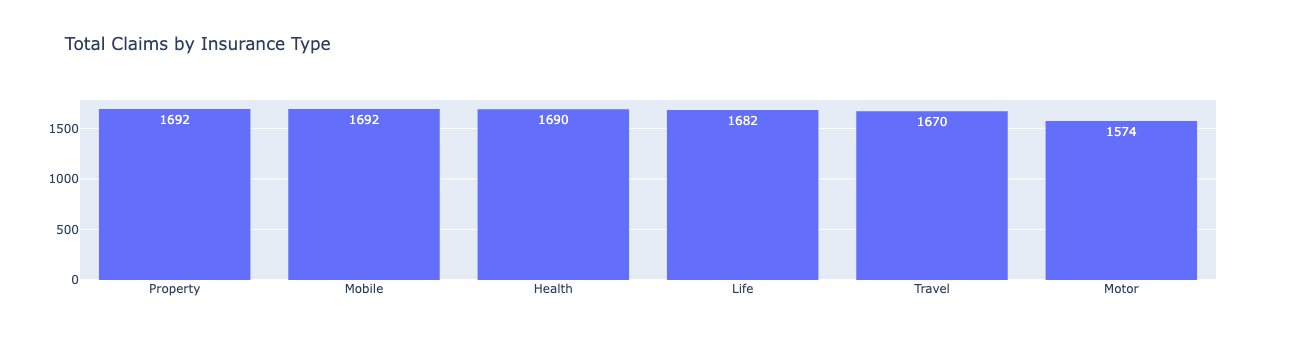

In [38]:
# plot bar chart

fig = px.histogram(types,
             x='INSURANCE_TYPE',
             y='TRANSACTION_ID',
             title="Total Claims by Insurance Type",
             labels={"INSURANCE_TYPE": ""},
             text_auto=True).update_xaxes(categoryorder="total descending")

fig.update_layout(yaxis_title="")

fig.show()

**The number of claims do not vary much based on insurance type. Motor insurance has the least amount of claims, with roughly 100 fewer claims than the other four insurance types.**

### 3. What are the top 5 states with the most insurance claims for customers belonging to the HIGH(H) risk assessment?

In [39]:
# query dataframe for high risk assessment, group by state, count the number of claims using the transaction ID column
states = claims.query("RISK_SEGMENTATION == 'H'")\
        .groupby('STATE')['TRANSACTION_ID']\
        .count()\
        .sort_values(ascending=False)\
        .reset_index()\
        .copy()\
       
states.head()

STATE  TRANSACTION_ID
0    CA             148
1    AZ             105
2    FL             104
3    TN             100
4    AR              97

**The top 5 states for claims by high risk customers are California, Arizona, Florida, Tennessee, and Arkansas. Below we will plot the number of high risk claims for each state in the video.**

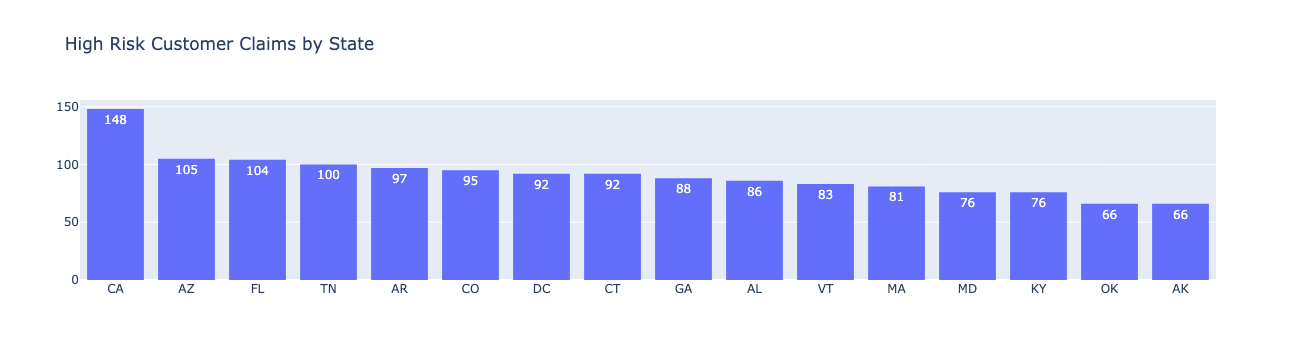

In [40]:
# plot bar chart

fig = px.histogram(states,
             x='STATE',
             y='TRANSACTION_ID',
             title="High Risk Customer Claims by State",
             labels={"STATE": ""},
             text_auto=True).update_xaxes(categoryorder="total descending")

fig.update_layout(yaxis_title="")

fig.show()

### 4. Create a new variable "COLOCATION" which will have the following values:
>IF customer state == incident state == agent address state THEN 1 ELSE 0

>Find the mean of this new column

In [41]:
# create function

def colo(row):
    if row['STATE'] == row['INCIDENT_STATE'] == row['STATE_AGENT']:
        val = 1
    else:
        val = 0
    return val

In [42]:
# apply function to dataframe

claims['COLOCATION'] = claims.apply(colo, axis=1)

# view sample of dataframe to check for new column

claims.sample(5)

TXN_DATE_TIME TRANSACTION_ID CUSTOMER_ID POLICY_NUMBER  \
2128  2020-08-25 00:00:00    TXN00002129   A00008986   PLC00002164   
4447  2020-11-27 00:00:00    TXN00004448   A00008293   PLC00001101   
4359  2020-11-23 00:00:00    TXN00004360   A00007687   PLC00004189   
9     2020-06-01 00:00:00    TXN00000010   A00002020   PLC00007657   
9817  2021-06-23 00:00:00    TXN00009818   A00008903   PLC00001293   

     POLICY_EFF_DT     LOSS_DT   REPORT_DT INSURANCE_TYPE  PREMIUM_AMOUNT  \
2128    2019-10-20  2020-08-19  2020-08-21         Travel           83.03   
4447    2011-11-07  2020-11-24  2020-11-24         Health          127.53   
4359    2017-02-18  2020-11-21  2020-11-21         Mobile           11.81   
9       2015-12-19  2020-05-15  2020-05-20         Travel           71.29   
9817    2014-07-05  2021-06-04  2021-06-09          Motor          128.41   

      CLAIM_AMOUNT       CUSTOMER_NAME               ADDRESS_LINE1  \
2128          5000     Nicole Williams            3118 Sora Avenue   
4447         15000       Sarah Clausen           4125 Cobia Street   
4359           300       Richard Brown      16040 North 67th Drive   
9             4000  Nicholas Honokaupu  1914 Stratford Downs Drive   
9817          9000       Jean Courtney            141 Lavigne Road   

     ADDRESS_LINE2         CITY STATE  POSTAL_CODE          SSN  \
2128                 Louisville    KY        40213  797-38-2748   
4447                Panama City    FL        32408  556-18-8815   
4359                     Peoria    AZ        85382  627-29-1968   
9                    Montgomery    AL        36117  722-69-3392   
9817                 Colchester    VT         5446  620-59-7137   

     MARITAL_STATUS  AGE  TENURE EMPLOYMENT_STATUS  NO_OF_FAMILY_MEMBERS  \
2128              Y   45      67                 Y                     5   
4447              Y   59     101                 Y                     5   
4359              Y   50      84                 Y                     2   
9                 Y   61     119                 Y                     4   
9817              Y   50      96                 Y                     5   

     RISK_SEGMENTATION HOUSE_TYPE SOCIAL_CLASS  ROUTING_NUMBER  \
2128                 L   Mortgage           MI       125093028   
4447                 M   Mortgage           HI       121982544   
4359                 M       Rent           MI       122006814   
9                    L       Rent           HI        16215148   
9817                 L       Rent           MI        50155468   

             ACCT_NUMBER CUSTOMER_EDUCATION_LEVEL CLAIM_STATUS  \
2128  FILK20741581691976                 Bachelor            A   
4447  WZIY67001651463122                  College            A   
4359  BBZQ64987233359488                  College            A   
9     UXQB38236110828938                      PhD            A   
9817  KWVM17224925850485                 Bachelor            A   

     INCIDENT_SEVERITY AUTHORITY_CONTACTED  ANY_INJURY  \
2128        Total Loss               Other           1   
4447        Major Loss                None           1   
4359        Minor Loss              Police           1   
9           Major Loss                None           0   
9817        Major Loss              Police           1   

      POLICE_REPORT_AVAILABLE INCIDENT_STATE  INCIDENT_CITY  \
2128                        1             TN      Nashville   
4447                        1             AR   Fayetteville   
4359                        0             AK      Anchorage   
9                           0             CA    San Leandro   
9817                        1             CA  Mammoth Lakes   

      INCIDENT_HOUR_OF_THE_DAY    AGENT_ID       VENDOR_ID  \
2128                         0  AGENT00017       VNDR00221   
4447                        18  AGENT01099       VNDR00269   
4359                        19  AGENT00717  Not Applicable   
9                            4  AGENT00682  Not Applicable   
9817           

In [43]:
# calculate mean

print(f"The mean of the COLOCATION column is {claims['COLOCATION'].mean()}")

The mean of the COLOCATION column is 0.0044


### 5. A data entry error was detected in the data and you are required to correct it:

>If for any claim transaction "AUTHORITY_CONTACTED" is NOT "Police" AND POLICE_REPORT_AVAILABLE == 1 Then Update "AUTHORITY_CONTACTED" to Police	

In [44]:
# view rows where claim transaction "AUTHORITY_CONTACTED" is NOT "Police" AND POLICE_REPORT_AVAILABLE == 1 

claims.query("AUTHORITY_CONTACTED != 'Police' & POLICE_REPORT_AVAILABLE == 1 ")

TXN_DATE_TIME TRANSACTION_ID CUSTOMER_ID POLICY_NUMBER  \
5     2020-06-01 00:00:00    TXN00000006   A00003571   PLC00007244   
10    2020-06-01 00:00:00    TXN00000011   A00007952   PLC00003007   
11    2020-06-01 00:00:00    TXN00000012   A00006313   PLC00002139   
12    2020-06-01 00:00:00    TXN00000013   A00003693   PLC00007839   
16    2020-06-01 00:00:00    TXN00000017   A00007184   PLC00000118   
...                   ...            ...         ...           ...   
9991  2021-06-30 00:00:00    TXN00009992   A00008542   PLC00000807   
9993  2021-06-30 00:00:00    TXN00009994   A00008267   PLC00009629   
9995  2021-06-30 00:00:00    TXN00009996   A00006029   PLC00007245   
9997  2021-06-30 00:00:00    TXN00009998   A00004230   PLC00006613   
9998  2021-06-30 00:00:00    TXN00009999   A00006694   PLC00001781   

     POLICY_EFF_DT     LOSS_DT   REPORT_DT INSURANCE_TYPE  PREMIUM_AMOUNT  \
5       2012-12-28  2020-05-20  2020-05-25           Life           87.02   
10      2019-03-30  2020-05-20  2020-05-25           Life           61.45   
11      2016-07-22  2020-05-21  2020-05-26          Motor          101.15   
12      2019-06-12  2020-05-24  2020-05-27         Health          157.95   
16      2014-04-17  2020-05-13  2020-05-18       Property          114.42   
...            ...         ...         ...            ...             ...   
9991    2018-03-29  2021-06-26  2021-06-27         Travel           88.20   
9993    2016-08-22  2021-06-22  2021-06-25           Life           91.53   
9995    2014-04-11  2021-06-25  2021-06-26          Motor          105.75   
9997    2018-10-11  2021-06-18  2021-06-23         Health          183.50   
9998    2016-01-29  2021-06-16  2021-06-21          Motor          113.46   

      CLAIM_AMOUNT     CUSTOMER_NAME             ADDRESS_LINE1 ADDRESS_LINE2  \
5            63000      Terrance Han    5275 North 59th Avenue                 
10           92000       Janet Watts          200 Redwood Road                 
11            8000  Patricia Garrett         6721 Boundary Run                 
12           11000      Lisa Rosario  12870 Old Seward Highway   #STE 000105   
16           39000   Michael Kimball            42 Edison Road                 
...            ...               ...                       ...           ...   
9991          3000         Adam Cast    10202 North 51st Drive                 
9993         78000   Roxanne Shipman         3102 Kinvara Lane                 
9995          1000    Patrick Hauman         126 Marjorie Lane             C   
9997          8000        Luis Clark       10980 Splendor Loop                 
9998          2000       Ryan Gordon               19 Heritage                 

            CITY STATE  POSTAL_CODE          SSN MARITAL_STATUS  AGE  TENURE  \
5       Glendale    AZ        85301  059-08-4065              N   42      38   
10    Manchester    CT         6040  233-66-3524              N   59      14   
11     Nashville    TN        37221  224-80-1633              Y   42      39   
12     Anchorage    AK        99515  115-30-1247              Y   57     118   
16    Manchester    CT         6040  448-54-0272              Y   53      19   
...          ...   ...          ...          ...            ...  ...     ...   
9991    Glendale    AZ        85302  154-30-6743              N   53      50   
9993  Louisville    KY        40242  355-62-7332              Y   44      41   
9995  Manchester    CT         6042  711-20-5046              N   45      98   
9997   Anchorage    AK        99577  743-01-9480              Y   53      32   
9998     Oakland    CA        94605  574-84-6660              Y   61      44   

     EMPLOYMENT_STATUS  NO_OF_FAMILY_MEMBERS RISK_SEGMENTATION HOUSE_TYPE  \
5                    Y                     2                 M       Rent   
10                   Y                     7                 M   Mortgage   
11                   Y                     2                 H        Own   
12              

In [45]:
# replace values that meet condition

claims['AUTHORITY_CONTACTED'] = np.where((claims['AUTHORITY_CONTACTED'] != 'Police')\
                                & (claims['POLICE_REPORT_AVAILABLE'] == 1),\
                                'Police', claims['AUTHORITY_CONTACTED'])

# check that replacement worked

claims.query("AUTHORITY_CONTACTED != 'Police' & POLICE_REPORT_AVAILABLE == 1 ")

Empty DataFrame
Columns: [TXN_DATE_TIME, TRANSACTION_ID, CUSTOMER_ID, POLICY_NUMBER, POLICY_EFF_DT, LOSS_DT, REPORT_DT, INSURANCE_TYPE, PREMIUM_AMOUNT, CLAIM_AMOUNT, CUSTOMER_NAME, ADDRESS_LINE1, ADDRESS_LINE2, CITY, STATE, POSTAL_CODE, SSN, MARITAL_STATUS, AGE, TENURE, EMPLOYMENT_STATUS, NO_OF_FAMILY_MEMBERS, RISK_SEGMENTATION, HOUSE_TYPE, SOCIAL_CLASS, ROUTING_NUMBER, ACCT_NUMBER, CUSTOMER_EDUCATION_LEVEL, CLAIM_STATUS, INCIDENT_SEVERITY, AUTHORITY_CONTACTED, ANY_INJURY, POLICE_REPORT_AVAILABLE, INCIDENT_STATE, INCIDENT_CITY, INCIDENT_HOUR_OF_THE_DAY, AGENT_ID, VENDOR_ID, VENDOR_NAME, ADDRESS_LINE1_VENDOR, ADDRESS_LINE2_VENDOR, CITY_VENDOR, STATE_VENDOR, POSTAL_CODE_VENDOR, AGENT_NAME, DATE_OF_JOINING, ADDRESS_LINE1_AGENT, ADDRESS_LINE2_AGENT, CITY_AGENT, STATE_AGENT, POSTAL_CODE_AGENT, EMP_ROUTING_NUMBER, EMP_ACCT_NUMBER, COLOCATION]
Index: []

**We no longer see rows matching this condition, the data error has successfully been corrected.**

### 6. Find all agents who have worked on more than 2 types of insurance claims. Sort them by total claim amount approved under them in descending order


In [46]:
multi = claims.groupby(['AGENT_ID', 'AGENT_NAME', 'CLAIM_AMOUNT'])['INSURANCE_TYPE']\
        .count().reset_index().sort_values('CLAIM_AMOUNT', ascending= False)

multi = multi.query("INSURANCE_TYPE > 2")

multi

AGENT_ID         AGENT_NAME  CLAIM_AMOUNT  INSURANCE_TYPE
5163  AGENT00688      Glenda Briney         20000               3
5963  AGENT00794     Gladys Parsons         20000               3
6641  AGENT00889        John Martin         20000               3
5660  AGENT00752      Trevor Bishop         19000               3
8435  AGENT01125   Frank Valenzuela         15000               3
...          ...                ...           ...             ...
2847  AGENT00379     Tracy Straight           300               3
3142  AGENT00414   Christine Carter           200               3
5504  AGENT00732        Sylvia Tran           100               3
746   AGENT00100        Steve Hayes           100               4
3108  AGENT00409  Darryl Hafenstein           100               3

[97 rows x 4 columns]

### 7. Mobile & Travel Insurance premiums are discounted by 10%; Health and Property Insurance premiums are increased by 7%; Life and Motor Insurance premiums are marginally increased by 2%. What will be overall change in % of the Premium Amount Collected for all these Customer?

In [47]:
# check total premium amount prior to premium changes

orig = claims['PREMIUM_AMOUNT'].sum().copy()

print(f"The total premium amount for all claim types is ${orig:,.2f}")

The total premium amount for all claim types is $885,085.95


In [48]:

for index, row in claims.iterrows():
    if row['INSURANCE_TYPE'] == 'Mobile' or 'Travel':
        claims.at[index, 'PREMIUM_AMOUNT'] *= 0.9  
    if row['INSURANCE_TYPE'] == 'Health' or 'Property':
        claims.at[index, 'PREMIUM_AMOUNT'] *= 1.07
    if row['INSURANCE_TYPE'] == 'Life' or 'Motor':
        claims.at[index, 'PREMIUM_AMOUNT'] *= 1.02 

In [49]:
# check total premium amount after premium changes

revised = claims['PREMIUM_AMOUNT'].sum()

print(f"The new total premium amount for all claim types is ${revised:,.2f}")

The new total premium amount for all claim types is $869,384.53


In [50]:
# calculate percent change

pct_change = (revised - orig)/orig

print(f"The overall percent change in the premium amounts collected for all claim types is {pct_change:.1%}")

The overall percent change in the premium amounts collected for all claim types is -1.8%


### 8. The company wants to give discounts to customer who are loyal and under stress due to Covid. They have laid out an eligibility criteria as follows: 
>IF customer tenure > 60 AND employment status = "N" AND # of family members >=4 THEN 1 ELSE 0 

>Create a new column "ELIGIBLE_FOR_DISCOUNT" and find the mean

In [51]:
# create function

def disc(row):
    if (row['TENURE'] > 60) & (row['EMPLOYMENT_STATUS'] == 'N') & (row['NO_OF_FAMILY_MEMBERS'] >= 4):
        val = 1
    else:
        val = 0
    return val

In [52]:
# apply function to dataframe

claims['ELIGIBLE_FOR_DISCOUNT'] = claims.apply(disc, axis=1)

# view sample of dataframe to check for new column

claims.sample(5)

TXN_DATE_TIME TRANSACTION_ID CUSTOMER_ID POLICY_NUMBER  \
8998  2021-05-23 00:00:00    TXN00008999   A00004083   PLC00001228   
7455  2021-03-23 00:00:00    TXN00007456   A00001059   PLC00003851   
9587  2021-06-15 00:00:00    TXN00009588   A00005709   PLC00005974   
9415  2021-06-08 00:00:00    TXN00009416   A00007941   PLC00001867   
5630  2021-01-11 00:00:00    TXN00005631   A00002267   PLC00001791   

     POLICY_EFF_DT     LOSS_DT   REPORT_DT INSURANCE_TYPE  PREMIUM_AMOUNT  \
8998    2010-12-09  2021-05-15  2021-05-18          Motor       92.754812   
7455    2018-12-23  2021-03-18  2021-03-19         Health      139.048726   
9587    2013-08-04  2021-06-01  2021-06-06         Mobile        9.547567   
9415    2018-06-07  2021-06-06  2021-06-06         Mobile       10.991489   
5630    2016-04-25  2020-12-23  2020-12-28       Property      110.946267   

      CLAIM_AMOUNT      CUSTOMER_NAME       ADDRESS_LINE1 ADDRESS_LINE2  \
8998          1000     James Kurohara  182 Regency Circle                 
7455          6000        Jimmy Lopez   2807 Huxley Place                 
9587           500        Becky Busse    2806 Bass Street                 
9415           100  Elnora Sunderland    6710 Quay Street                 
5630         20000     Beverly Jordan  218 Oleander Drive                 

                   CITY STATE  POSTAL_CODE          SSN MARITAL_STATUS  AGE  \
8998             Pooler    GA        31322  888-91-7552              Y   44   
7455            Fremont    CA        94555  198-20-3485              Y   40   
9587          Anchorage    AK        99507  882-98-3790              Y   41   
9415             Arvada    CO        80003  469-54-3154              Y   26   
5630  Panama City Beach    FL        32413  077-14-0739              Y   29   

      TENURE EMPLOYMENT_STATUS  NO_OF_FAMILY_MEMBERS RISK_SEGMENTATION  \
8998      72                 Y                     6                 L   
7455      89                 Y                     6                 L   
9587      60                 Y                     4                 M   
9415      59                 N                     7                 H   
5630      22                 Y                     7                 L   

     HOUSE_TYPE SOCIAL_CLASS  ROUTING_NUMBER         ACCT_NUMBER  \
8998        Own           MI        74671627  GHRK74675903271808   
7455   Mortgage           HI        39649199  OIMU17052757152107   
9587       Rent           MI       106006775  MWPA09144835129173   
9415       Rent           MI       128529492  RRSA30890285663273   
5630   Mortgage           MI        65861352  GLND22751218347857   

     CUSTOMER_EDUCATION_LEVEL CLAIM_STATUS INCIDENT_SEVERITY  \
8998                  College            A        Minor Loss   
7455              High School            A        Minor Loss   
9587                       MD            A        Minor Loss   
9415                 Bachelor            A        Minor Loss   
5630                  College            A        Major Loss   

     AUTHORITY_CONTACTED  ANY_INJURY  POLICE_REPORT_AVAILABLE INCIDENT_STATE  \
8998              Police           1                        1             CA   
7455              Police           0                        1             CA   
9587              Police           1                        1             AL   
9415              Police           0                        1             CA   
5630              Police           0                        1             AZ   

     INCIDENT_CITY  INCIDENT_HOUR_OF_THE_DAY    AGENT_ID       VENDOR_ID  \
8998       Oakland                         0  AGENT00451       VNDR00412   
7455        Carson                         3  AGENT00610       VNDR00093   
9587    Montgomery                         8  AGENT00243       VNDR00249   
9415       Fremont                         0  AGENT01056       VNDR00090   
5630      Glendale                        15  AGENT00651  Not Applicable   

                VENDOR_NA

In [53]:
# calculate mean

print(f"The mean of the ELIGIBLE_FOR_DISCOUNT column is {claims['ELIGIBLE_FOR_DISCOUNT'].mean()}")

The mean of the ELIGIBLE_FOR_DISCOUNT column is 0.0299


### 9. The company wants to check claim velocity which is defined as follows:
>CLAIM_VELOCITY = NO_OF_CLAIMS_IN_LAST30DAYS (for the current insurance type) / NO_OF_CLAIMS_IN_LAST3DAYS (for the current insurance type) 

In [54]:
max_date = claims['TXN_DATE_TIME'].max()

In [55]:
# create dataframe of records from the last 3 days

claims_03 = claims.copy()

claims_03['TXN_DATE_TIME'] = pd.to_datetime(claims_03['TXN_DATE_TIME'])

claims_03 = claims_03[claims_03['TXN_DATE_TIME'] >= (pd.to_datetime(max_date) - pd.Timedelta(days=3))]

claims_03 = claims_03.groupby('INSURANCE_TYPE')['TRANSACTION_ID'].count()

In [56]:
claims_03

INSURANCE_TYPE
Health      16
Life        20
Mobile      15
Motor       18
Property    17
Travel      17
Name: TRANSACTION_ID, dtype: int64

In [57]:
# create dataframe of records from the last 30 days

claims_30 = claims.copy()

claims_30['TXN_DATE_TIME'] = pd.to_datetime(claims_30['TXN_DATE_TIME'])

claims_30 = claims_30[claims_30['TXN_DATE_TIME'] >= (pd.to_datetime(max_date) - pd.Timedelta(days=30))]

claims_30 = claims_30.groupby('INSURANCE_TYPE')['TRANSACTION_ID'].count()

In [58]:
claims_30

INSURANCE_TYPE
Health      138
Life        146
Mobile      139
Motor       127
Property    133
Travel      128
Name: TRANSACTION_ID, dtype: int64

In [59]:
# create new dataframe with results of velocity calculation

CLAIM_VELOCITY = (claims_30/claims_03).reset_index()
CLAIM_VELOCITY.columns = ['INSURANCE_TYPE', 'CLAIM_VELOCITY']
CLAIM_VELOCITY

INSURANCE_TYPE  CLAIM_VELOCITY
0         Health        8.625000
1           Life        7.300000
2         Mobile        9.266667
3          Motor        7.055556
4       Property        7.823529
5         Travel        7.529412

### 10. Find all low performing agents i.e. employees who are in the bottom 5 percentile based on claims worked by them

In [60]:
# view count of claims by agent
agent_claims = claims.groupby(['AGENT_ID', 'AGENT_NAME'])['TRANSACTION_ID']\
               .count()\
               .sort_values(ascending=False)\
               .reset_index()

agent_claims.columns = ['AGENT_ID', 'AGENT_NAME', "CLAIMS_WORKED"]
agent_claims

AGENT_ID        AGENT_NAME  CLAIMS_WORKED
0     AGENT00992     James Velasco             19
1     AGENT00319    Frances Kimble             18
2     AGENT00849    Debbra Collins             17
3     AGENT00388       Larry Scott             17
4     AGENT01106     Isaac Willard             16
...          ...               ...            ...
1195  AGENT01077     Sandra Tucker              2
1196  AGENT00621    Richard Murphy              2
1197  AGENT00536  Florence Ashlock              2
1198  AGENT00252       Harold Bonn              1
1199  AGENT01161   Charlotte Payne              1

[1200 rows x 3 columns]

In [61]:
# find 5th percentile based on number of claims worked by agent
bottom = agent_claims['CLAIMS_WORKED'].quantile(0.05, interpolation='higher')
bottom

4

In [62]:
# list agents in the bottom 5th percentile
agent_claims.query("CLAIMS_WORKED <= @bottom")

AGENT_ID        AGENT_NAME  CLAIMS_WORKED
1117  AGENT01151     Clarence Saul              4
1118  AGENT01145  Jacqueline Scott              4
1119  AGENT00706      Laura Staggs              4
1120  AGENT00882   Robert Musgrave              4
1121  AGENT00560  Delphia Sammarco              4
...          ...               ...            ...
1195  AGENT01077     Sandra Tucker              2
1196  AGENT00621    Richard Murphy              2
1197  AGENT00536  Florence Ashlock              2
1198  AGENT00252       Harold Bonn              1
1199  AGENT01161   Charlotte Payne              1

[83 rows x 3 columns]

### 11. The company wants to find all suspicious employees (Agents)
	IF TOTAL CLAIM AMOUNT which meets criteria below is >= 15000 THEN AGENT is classified as Suspicious ELSE Not 
    -------
    CLAIM_STATUS = Approved AND CUSTOMER_RISK_SEGMENTATION = High AND INCIDENT_SEVERITY = "Major Loss" 
	If Suspicious THEN 1 ELSE 0. 
    
    Find mean of this column.

In [63]:
# create function

def suspicious(row):
    if (row['CLAIM_AMOUNT'] >= 15000) & (row['CLAIM_STATUS'] == 'Approved')\
            & (row['CUSTOMER_RISK_SEGMENTATION'] == 'H')\
            & (row['INCIDENT_SEVERITY'] == 'Major Loss'):
        val = 1
    else:
        val = 0
    return val

In [64]:
# apply function to dataframe

claims['SUSPICIOUS_EMP'] = claims.apply(disc, axis=1)

# view sample of dataframe to check for new column

claims.sample(5)

TXN_DATE_TIME TRANSACTION_ID CUSTOMER_ID POLICY_NUMBER  \
3513  2020-10-21 00:00:00    TXN00003514   A00007921   PLC00003189   
9052  2021-05-25 00:00:00    TXN00009053   A00005090   PLC00001048   
6006  2021-01-26 00:00:00    TXN00006007   A00000522   PLC00000257   
1162  2020-07-16 00:00:00    TXN00001163   A00008148   PLC00005591   
5839  2021-01-19 00:00:00    TXN00005840   A00006040   PLC00001856   

     POLICY_EFF_DT     LOSS_DT   REPORT_DT INSURANCE_TYPE  PREMIUM_AMOUNT  \
3513    2017-03-13  2020-10-10  2020-10-15           Life       54.318978   
9052    2013-09-26  2021-05-05  2021-05-10       Property      138.606709   
6006    2010-11-03  2021-01-13  2021-01-18          Motor       75.653665   
1162    2012-01-05  2020-07-15  2020-07-15           Life       60.104489   
5839    2017-08-29  2021-01-12  2021-01-14          Motor       80.407804   

      CLAIM_AMOUNT     CUSTOMER_NAME                ADDRESS_LINE1  \
3513         54000  Elizabeth Bowers      733 East DeRenne Avenue   
9052         19000       Mason Pfost       464 Springfield Street   
6006         10000    Jessica Crosby        1822 Pine Grove Court   
1162         30000   William Clifton  1400 Rosa L Parks Boulevard   
5839          1000   Susan Ballinger              310 12th Avenue   

     ADDRESS_LINE2        CITY STATE  POSTAL_CODE          SSN MARITAL_STATUS  \
3513                  Savannah    GA        31405  827-27-2893              Y   
9052                 Wilbraham    MA         1095  106-59-5393              N   
6006                    Severn    MD        21144  240-35-3566              Y   
1162          #305   Nashville    TN        37208  748-18-0994              Y   
5839                Santa Cruz    CA        95062  097-47-7928              Y   

      AGE  TENURE EMPLOYMENT_STATUS  NO_OF_FAMILY_MEMBERS RISK_SEGMENTATION  \
3513   46      98                 Y                     6                 L   
9052   39      44                 N                     5                 M   
6006   47      91                 Y                     2                 L   
1162   33      80                 Y                     4                 L   
5839   55      78                 Y                     3                 M   

     HOUSE_TYPE SOCIAL_CLASS  ROUTING_NUMBER         ACCT_NUMBER  \
3513        Own           HI        40187792  KFRA87184318989920   
9052       Rent           MI        49809550  DDNU70999700249609   
6006       Rent           MI       110219671  FEUQ62409459732205   
1162   Mortgage           MI        47392250  SYSQ62745033117055   
5839        Own           MI        36276277  BVUN08506350378633   

     CUSTOMER_EDUCATION_LEVEL CLAIM_STATUS INCIDENT_SEVERITY  \
3513                 Bachelor            A        Minor Loss   
9052                 Bachelor            D        Major Loss   
6006              High School            A        Major Loss   
1162                 Bachelor            A        Total Loss   
5839                  College            A        Total Loss   

     AUTHORITY_CONTACTED  ANY_INJURY  POLICE_REPORT_AVAILABLE INCIDENT_STATE  \
3513              Police           1                        1             CO   
9052              Police           1                        1             VT   
6006           Ambulance           1                        0             MA   
1162                None           1                        0             AR   
5839              Police           1                        1             CO   

     INCIDENT_CITY  INCIDENT_HOUR_OF_THE_DAY    AGENT_ID       VENDOR_ID  \
3513        Arvada                        12  AGENT00026  Not Applicable   
9052      Brighton                         9  AGENT00680  Not Applicable   
6006       Holyoke                        17  AGENT01028       VNDR00445   
1162     Van Buren                         2  AGENT01084       VNDR00546   
5839        Aurora                        17  AGENT00246       VNDR00258   

                  V

In [65]:
# view mean of new column

print(f"The mean of the Suspicious_Emp column is {claims['SUSPICIOUS_EMP'].mean()}")

The mean of the Suspicious_Emp column is 0.0299


In [66]:
# view list of suspicious employees

suspicious = claims.query("SUSPICIOUS_EMP == 1")[['AGENT_ID', 'AGENT_NAME', 'CLAIM_AMOUNT', 'SUSPICIOUS_EMP']]\
             .sort_values(by='CLAIM_AMOUNT', ascending=False)

suspicious = suspicious.groupby(['AGENT_ID', 'AGENT_NAME'])[['SUSPICIOUS_EMP', 'CLAIM_AMOUNT']]\
            .sum()\
            .copy()\
            .reset_index()\
            .sort_values(by=['SUSPICIOUS_EMP', 'CLAIM_AMOUNT'], ascending=False)

suspicious

AGENT_ID       AGENT_NAME  SUSPICIOUS_EMP  CLAIM_AMOUNT
221  AGENT00992    James Velasco               3         50000
120  AGENT00576  Bertha Reynolds               2        160000
13   AGENT00059   Suzanne Amador               2        157000
1    AGENT00004       Mary Smith               2        101000
40   AGENT00219     Gary Grigsby               2        101000
..          ...              ...             ...           ...
32   AGENT00175     Mario Willis               1           100
98   AGENT00458      Nina Delker               1           100
144  AGENT00669     Clayton Veit               1           100
152  AGENT00697        Judy Hall               1           100
173  AGENT00774     Alfred Acuna               1           100

[257 rows x 4 columns]

In [67]:
print(f"There are {suspicious['AGENT_ID'].nunique()} employees that are considered 'suspicious'. The largest claim payout by a 'suspicious' employee is ${suspicious['CLAIM_AMOUNT'].max():,.0f}.")

There are 257 employees that are considered 'suspicious'. The largest claim payout by a 'suspicious' employee is $160,000.


In [68]:
# view list of 'suspicious' employees with more than one claim

suspicious.query("SUSPICIOUS_EMP > 1")

AGENT_ID         AGENT_NAME  SUSPICIOUS_EMP  CLAIM_AMOUNT
221  AGENT00992      James Velasco               3         50000
120  AGENT00576    Bertha Reynolds               2        160000
13   AGENT00059     Suzanne Amador               2        157000
1    AGENT00004         Mary Smith               2        101000
40   AGENT00219       Gary Grigsby               2        101000
195  AGENT00877   Jacob Williamson               2         97000
225  AGENT01022       Emily Mellas               2         75700
11   AGENT00044      Earnest White               2         72000
207  AGENT00935        Adam Villar               2         59000
140  AGENT00660     Ralph Roberson               2         57000
209  AGENT00947     Luis Castleman               2         52000
253  AGENT01172   Katherine Garcia               2         51100
249  AGENT01142         Frank Kuss               2         51000
112  AGENT00545       Bruce Weeden               2         46000
222  AGENT01001   Bradley Bautista               2         45000
110  AGENT00526       Doris Aragon               2         37000
248  AGENT01138        Allen Ayers               2         34000
161  AGENT00731        Lacy Powers               2         31000
254  AGENT01178        David Young               2         29000
56   AGENT00265      Roberta Lewis               2         27000
131  AGENT00619   Billie Barefield               2         27000
82   AGENT00382   Deborah Cendejas               2         26000
100  AGENT00473   Kenneth Bottorff               2         22000
64   AGENT00305  Randall Gutierrez               2         21400
223  AGENT01015  Alexandra Morvant               2         21000
204  AGENT00919   Aurelio Phillips               2         19200
115  AGENT00558     Cecile Pasceri               2         18000
217  AGENT00977      Alan Martinez               2         18000
52   AGENT00251    James Alexander               2         14000
150  AGENT00691        Terri Kranz               2         12600
35   AGENT00186     Clifford Price               2         10600
29   AGENT00167    William Wiggins               2          8500
180  AGENT00799         Jimmy Sisk               2          8100
224  AGENT01019    Sharon Thompson               2          8000
81   AGENT00380      Louise Turney               2          5000
177  AGENT00787        Etta Brooks               2          5000
256  AGENT01180        Leo Leblanc               2          4600
117  AGENT00565    Jonathan Onusko               2          3200
83   AGENT00383    Fredrick Killen               2          2300
109  AGENT00524     Sylvia Bapties               2          2300
22   AGENT00113       Ethel Cotton               2          1000

## Extended Exploratory Data Analysis

In [69]:
# calculate mean claim amount by claim type

avg_claim = claims.groupby("INSURANCE_TYPE")["CLAIM_AMOUNT"].mean()\
            .copy()\
            .reset_index()\
            .sort_values(by="CLAIM_AMOUNT")

avg_claim.columns = ["INSURANCE_TYPE","AVG_CLAIM_AMOUNT"]
avg_claim

INSURANCE_TYPE  AVG_CLAIM_AMOUNT
2         Mobile        406.796690
5         Travel       2979.640719
3          Motor       5503.811944
0         Health      10801.183432
4       Property      24573.877069
1           Life      54386.444709

Text(0.5, 0.98, 'Distribution of Claim Amount by Insurance Type')

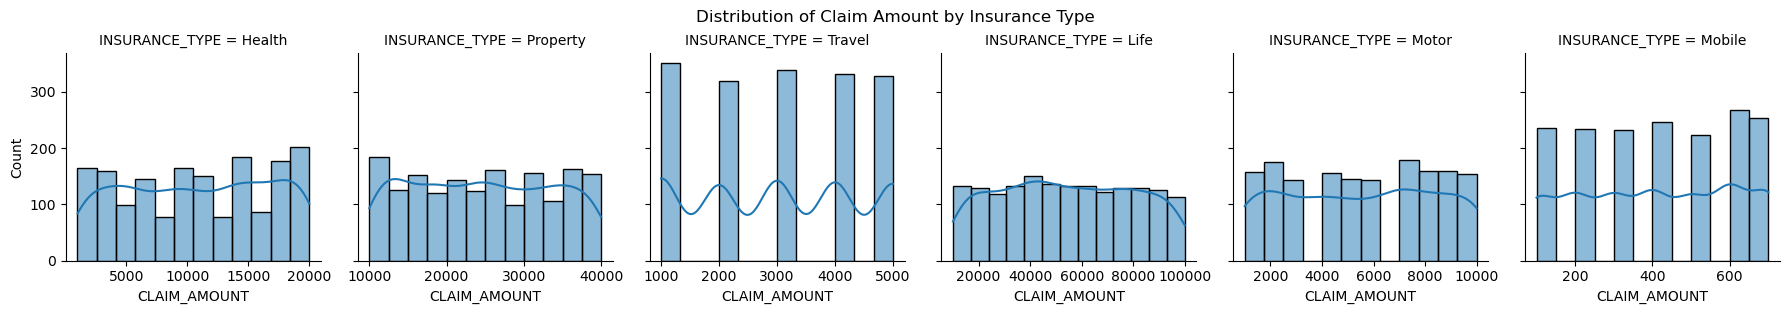

In [70]:
# plot distribution of claim amount by insurance type

ins_type = sns.FacetGrid(claims, col = "INSURANCE_TYPE", sharex=False)
ins_type.map(sns.histplot, "CLAIM_AMOUNT", kde=True)

ins_type.fig.suptitle("Distribution of Claim Amount by Insurance Type", verticalalignment='bottom')

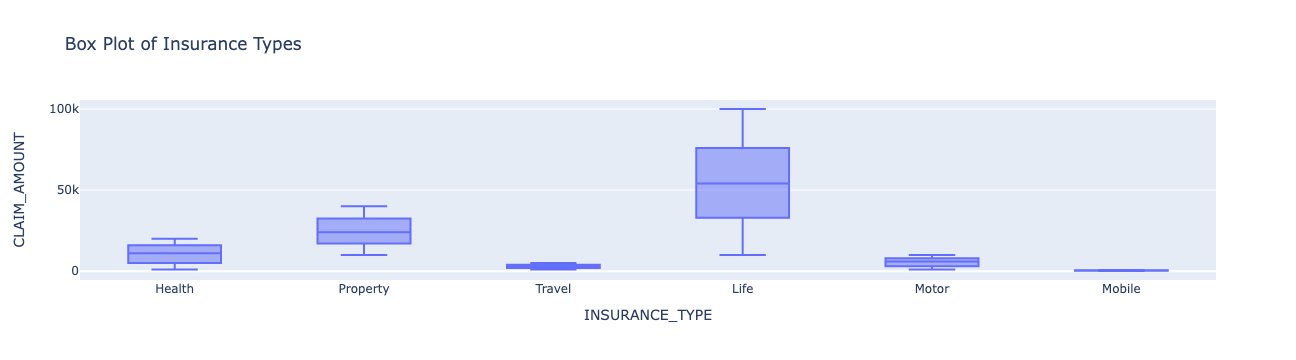

In [71]:
# plot quartiles of claim amounts by insurance types

fig = px.box(claims, 
      x="INSURANCE_TYPE", 
      y="CLAIM_AMOUNT",
      title="Box Plot of Insurance Types")

fig.show()

In [72]:
# plot total number of claims by claim status and insurance type
status = claims.groupby(["INSURANCE_TYPE",'CLAIM_STATUS'])['TRANSACTION_ID']\
        .count()\
        .reset_index()\
        .copy()

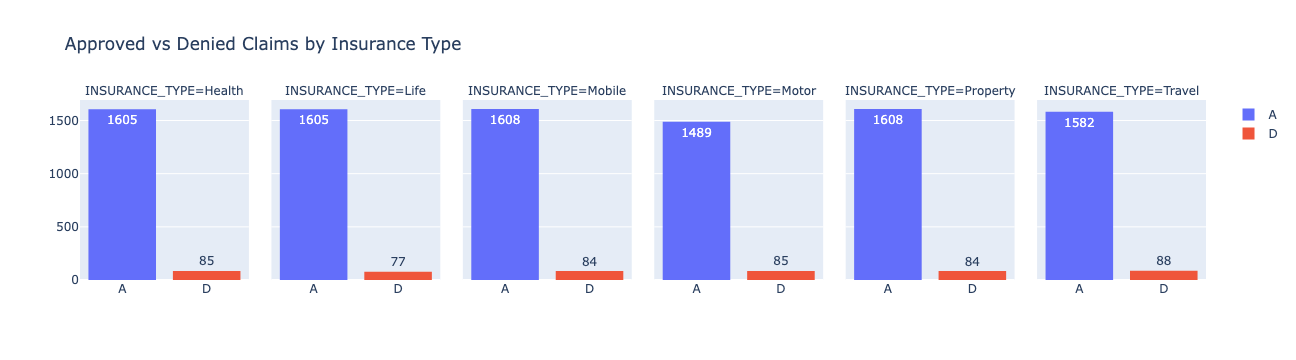

In [73]:
fig = px.histogram(status,
             x='CLAIM_STATUS',
             y='TRANSACTION_ID',
             facet_col='INSURANCE_TYPE',
             color="CLAIM_STATUS",
             title="Approved vs Denied Claims by Insurance Type",
             labels={"CLAIM_STATUS": ""},
             text_auto=True,
             category_orders={"CLAIM_STATUS":["A","D"]})

fig.update_layout(yaxis_title="")

fig.show()

In [74]:
# calculate total number of claims by risk segmentation
risk = claims.groupby(["INSURANCE_TYPE",'RISK_SEGMENTATION'])['TRANSACTION_ID']\
        .count()\
        .reset_index()\
        .copy()

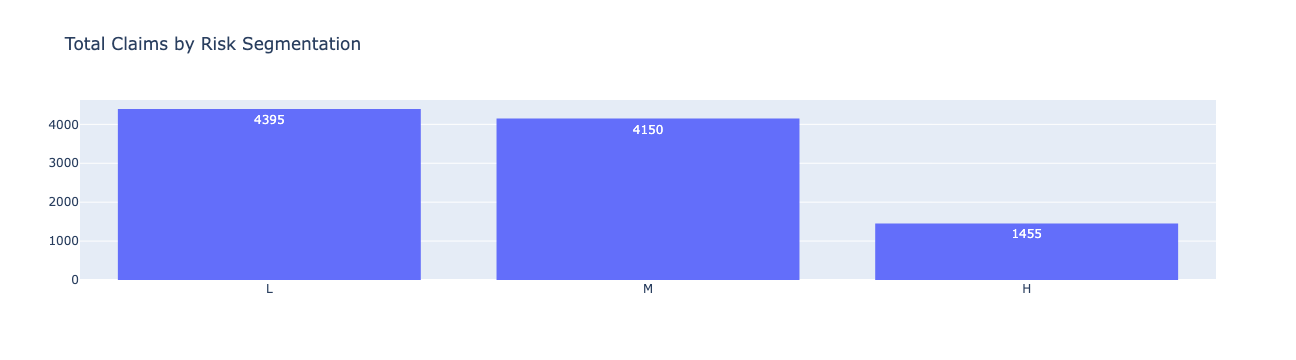

In [75]:
fig = px.histogram(risk,
             x='RISK_SEGMENTATION',
             y='TRANSACTION_ID',
             title="Total Claims by Risk Segmentation",
             labels={"RISK_SEGMENTATION": ""},
             text_auto=True).update_xaxes(categoryorder="total descending")

fig.update_layout(yaxis_title="")

fig.show()

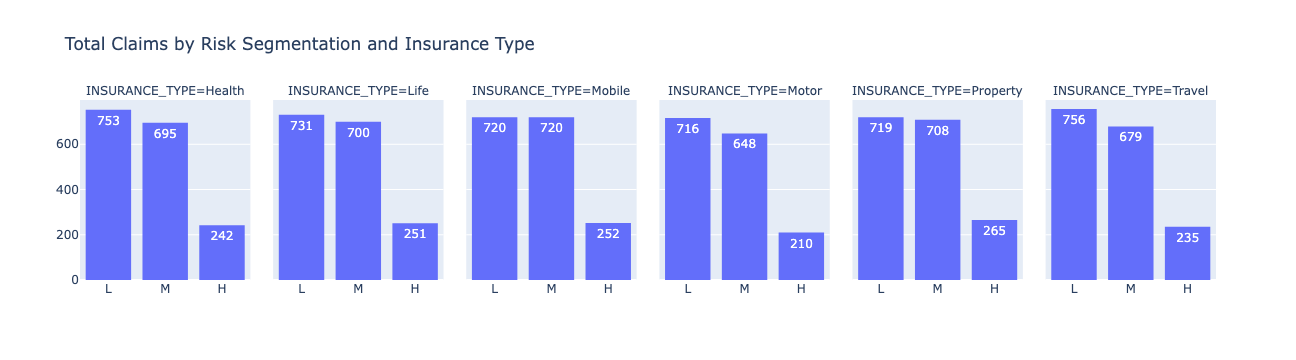

In [76]:
fig = px.histogram(risk,
             x='RISK_SEGMENTATION',
             y='TRANSACTION_ID',
             facet_col='INSURANCE_TYPE',
             title="Total Claims by Risk Segmentation and Insurance Type",
             labels={"RISK_SEGMENTATION": ""},
             text_auto=True,
             category_orders={"RISK_SEGMENTATION":["L","M","H"]})

fig.update_layout(yaxis_title="")

fig.show()

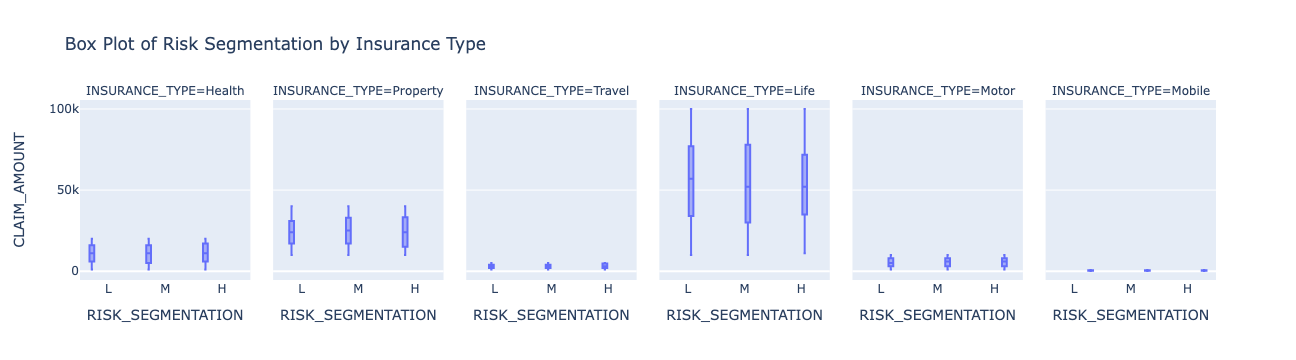

In [77]:
# plot quartiles of claim amounts by risk segmentation

fig = px.box(claims, 
      x="RISK_SEGMENTATION", 
      y="CLAIM_AMOUNT", 
      facet_col='INSURANCE_TYPE',
      title="Box Plot of Risk Segmentation by Insurance Type")

fig.show()

In [78]:
# plot total number of claims by incident severity and insurance type
severity = claims.groupby(["INSURANCE_TYPE",'INCIDENT_SEVERITY'])['TRANSACTION_ID']\
        .count()\
        .reset_index()\
        .copy()

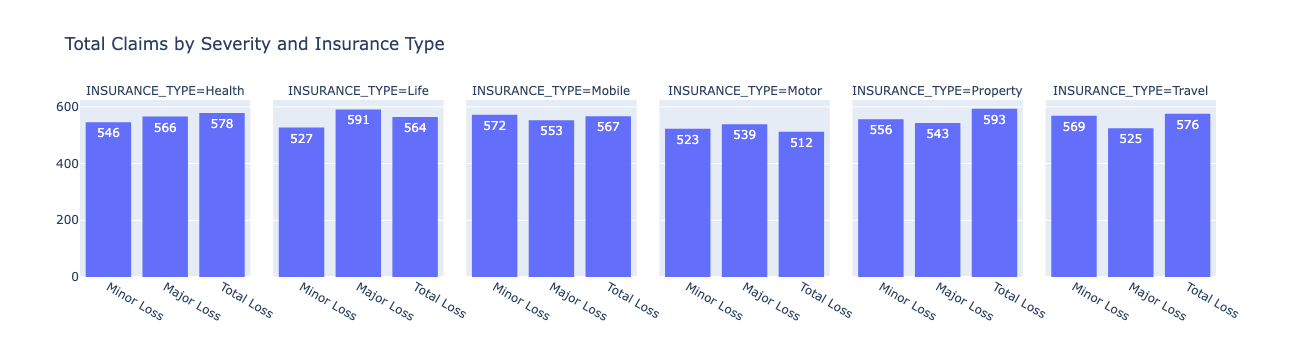

In [79]:
fig = px.histogram(severity,
             x='INCIDENT_SEVERITY',
             y='TRANSACTION_ID',
             facet_col='INSURANCE_TYPE',
             title="Total Claims by Severity and Insurance Type",
             labels={"INCIDENT_SEVERITY": ""},
             text_auto=True,
             category_orders={"INCIDENT_SEVERITY":["Minor Loss","Major Loss","Total Loss"]})

fig.update_layout(yaxis_title="")

fig.show()

In [80]:
# plot average claim amount by incident severity and insurance type
severity_avg = claims.groupby(["INSURANCE_TYPE",'INCIDENT_SEVERITY'])['CLAIM_AMOUNT']\
        .mean()\
        .reset_index()\
        .copy()

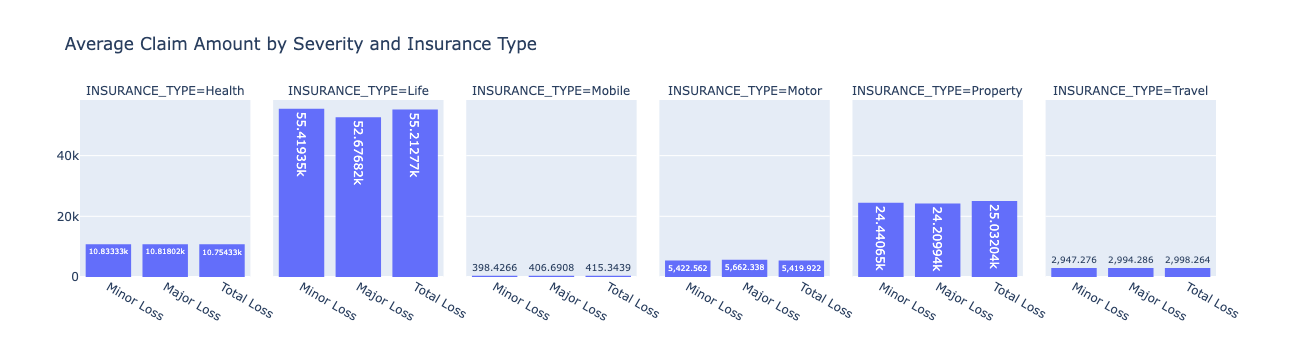

In [81]:
fig = px.histogram(severity_avg,
             x='INCIDENT_SEVERITY',
             y='CLAIM_AMOUNT',
             facet_col='INSURANCE_TYPE',
             title="Average Claim Amount by Severity and Insurance Type",
             labels={"INCIDENT_SEVERITY": ""},
             text_auto=True,
             category_orders={"INCIDENT_SEVERITY":["Minor Loss","Major Loss","Total Loss"]})

fig.update_layout(yaxis_title="")

fig.show()

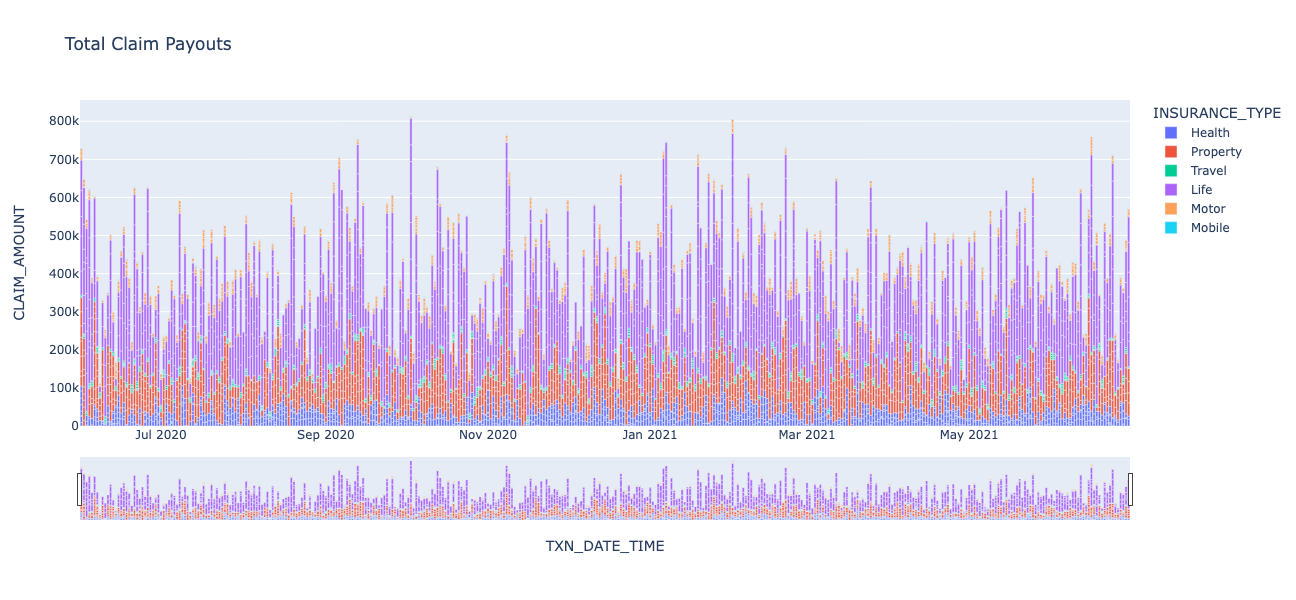

In [82]:
fig = px.bar(claims.query("CLAIM_STATUS == 'A'"), 
      x="TXN_DATE_TIME", 
      y="CLAIM_AMOUNT",
      color="INSURANCE_TYPE",
      title="Total Claim Payouts",
      height=600)

fig.update_xaxes(rangeslider_visible=True)

fig.show()

### Are there any claims that are within 30 days of the policy effective date? 60?

In [83]:
# create column that caluclates the number of days from the policy effective date to the loss date
claims['DAYS_FROM_POLICY'] = pd.to_datetime(claims['LOSS_DT']) - pd.to_datetime(claims['POLICY_EFF_DT'])
claims.sample(5)

TXN_DATE_TIME TRANSACTION_ID CUSTOMER_ID POLICY_NUMBER  \
6615  2021-02-16 00:00:00    TXN00006616   A00000320   PLC00004446   
8709  2021-05-13 00:00:00    TXN00008710   A00000861   PLC00000370   
6338  2021-02-07 00:00:00    TXN00006339   A00000409   PLC00002806   
4724  2020-12-08 00:00:00    TXN00004725   A00002859   PLC00001216   
3541  2020-10-22 00:00:00    TXN00003542   A00009663   PLC00001954   

     POLICY_EFF_DT     LOSS_DT   REPORT_DT INSURANCE_TYPE  PREMIUM_AMOUNT  \
6615    2017-09-24  2021-02-12  2021-02-13         Travel       68.129554   
8709    2012-04-19  2021-05-08  2021-05-09       Property      117.124682   
6338    2012-11-14  2021-01-21  2021-01-26         Health      115.641470   
4724    2016-12-10  2020-11-24  2020-11-29          Motor      134.176716   
3541    2015-05-05  2020-10-16  2020-10-18           Life       78.197719   

      CLAIM_AMOUNT    CUSTOMER_NAME               ADDRESS_LINE1 ADDRESS_LINE2  \
6615          3000    Glenn Hickman            8666 Iris Street                 
8709         33000    Patricia Yoon         840 Inglewood Drive                 
6338          6000  Fred Valenzuela  1217 Southwest 91st Street                 
4724         10000   Chris Martinez       32512 Christine Drive                 
3541         38000     Ralph Potter         3388 Thomasson Lane                 

                 CITY STATE  POSTAL_CODE          SSN MARITAL_STATUS  AGE  \
6615           Arvada    CO        80005  481-14-6002              N   34   
8709  West Sacramento    CA        95605  665-77-1445              Y   31   
6338    Oklahoma City    OK        73139  853-02-0429              N   63   
4724       Union City    CA        94587  405-26-2373              N   35   
3541        Fairfield    CA        94534  223-90-7044              N   27   

      TENURE EMPLOYMENT_STATUS  NO_OF_FAMILY_MEMBERS RISK_SEGMENTATION  \
6615     113                 Y                     7                 M   
8709      23                 Y                     2                 L   
6338      67                 Y                     3                 H   
4724      14                 Y                     6                 M   
3541     114                 Y                     6                 H   

     HOUSE_TYPE SOCIAL_CLASS  ROUTING_NUMBER         ACCT_NUMBER  \
6615       Rent           MI       110814869  SLKJ41577348481347   
8709       Rent           LI        89923603  QGWS69491675879512   
6338       Rent           HI        55610364  KVCT64359735427857   
4724   Mortgage           LI        42523134  GAOW36649373787948   
3541   Mortgage           MI        48575351  JWZI80050872248331   

     CUSTOMER_EDUCATION_LEVEL CLAIM_STATUS INCIDENT_SEVERITY  \
6615              High School            A        Minor Loss   
8709                 Bachelor            A        Total Loss   
6338                 Bachelor            A        Major Loss   
4724                      PhD            A        Major Loss   
3541             Not Reported            A        Total Loss   

     AUTHORITY_CONTACTED  ANY_INJURY  POLICE_REPORT_AVAILABLE INCIDENT_STATE  \
6615                None           0                        0             CA   
8709              Police           1                        1             TN   
6338              Police           1                        1             CT   
4724              Police           1                        1             MD   
3541           Ambulance           1                        0             AK   

     INCIDENT_CITY  INCIDENT_HOUR_OF_THE_DAY    AGENT_ID  VENDOR_ID  \
6615       Fremont                         7  AGENT00604  VNDR00303   
8709     Brentwood                        14  AGENT01078  VNDR00524   
6338    Manchester                        14  AGENT00628  VNDR00296   
4724      Pasadena                        18  AGENT00816  VNDR00557   
3541     Anchorage                         3  AGENT00509  VNDR00115   

                VENDOR_NAME    

In [84]:
claims[claims["DAYS_FROM_POLICY"] <= pd.Timedelta(days=60)]

Empty DataFrame
Columns: [TXN_DATE_TIME, TRANSACTION_ID, CUSTOMER_ID, POLICY_NUMBER, POLICY_EFF_DT, LOSS_DT, REPORT_DT, INSURANCE_TYPE, PREMIUM_AMOUNT, CLAIM_AMOUNT, CUSTOMER_NAME, ADDRESS_LINE1, ADDRESS_LINE2, CITY, STATE, POSTAL_CODE, SSN, MARITAL_STATUS, AGE, TENURE, EMPLOYMENT_STATUS, NO_OF_FAMILY_MEMBERS, RISK_SEGMENTATION, HOUSE_TYPE, SOCIAL_CLASS, ROUTING_NUMBER, ACCT_NUMBER, CUSTOMER_EDUCATION_LEVEL, CLAIM_STATUS, INCIDENT_SEVERITY, AUTHORITY_CONTACTED, ANY_INJURY, POLICE_REPORT_AVAILABLE, INCIDENT_STATE, INCIDENT_CITY, INCIDENT_HOUR_OF_THE_DAY, AGENT_ID, VENDOR_ID, VENDOR_NAME, ADDRESS_LINE1_VENDOR, ADDRESS_LINE2_VENDOR, CITY_VENDOR, STATE_VENDOR, POSTAL_CODE_VENDOR, AGENT_NAME, DATE_OF_JOINING, ADDRESS_LINE1_AGENT, ADDRESS_LINE2_AGENT, CITY_AGENT, STATE_AGENT, POSTAL_CODE_AGENT, EMP_ROUTING_NUMBER, EMP_ACCT_NUMBER, COLOCATION, ELIGIBLE_FOR_DISCOUNT, SUSPICIOUS_EMP, DAYS_FROM_POLICY]
Index: []

In [85]:
claims[claims["DAYS_FROM_POLICY"] <= pd.Timedelta(days=60)]

Empty DataFrame
Columns: [TXN_DATE_TIME, TRANSACTION_ID, CUSTOMER_ID, POLICY_NUMBER, POLICY_EFF_DT, LOSS_DT, REPORT_DT, INSURANCE_TYPE, PREMIUM_AMOUNT, CLAIM_AMOUNT, CUSTOMER_NAME, ADDRESS_LINE1, ADDRESS_LINE2, CITY, STATE, POSTAL_CODE, SSN, MARITAL_STATUS, AGE, TENURE, EMPLOYMENT_STATUS, NO_OF_FAMILY_MEMBERS, RISK_SEGMENTATION, HOUSE_TYPE, SOCIAL_CLASS, ROUTING_NUMBER, ACCT_NUMBER, CUSTOMER_EDUCATION_LEVEL, CLAIM_STATUS, INCIDENT_SEVERITY, AUTHORITY_CONTACTED, ANY_INJURY, POLICE_REPORT_AVAILABLE, INCIDENT_STATE, INCIDENT_CITY, INCIDENT_HOUR_OF_THE_DAY, AGENT_ID, VENDOR_ID, VENDOR_NAME, ADDRESS_LINE1_VENDOR, ADDRESS_LINE2_VENDOR, CITY_VENDOR, STATE_VENDOR, POSTAL_CODE_VENDOR, AGENT_NAME, DATE_OF_JOINING, ADDRESS_LINE1_AGENT, ADDRESS_LINE2_AGENT, CITY_AGENT, STATE_AGENT, POSTAL_CODE_AGENT, EMP_ROUTING_NUMBER, EMP_ACCT_NUMBER, COLOCATION, ELIGIBLE_FOR_DISCOUNT, SUSPICIOUS_EMP, DAYS_FROM_POLICY]
Index: []

**None of the claims are within 60 days of the policy effective date.**

### Do any policy holders have multiple claim payouts?

In [86]:
num_claims = claims.groupby(by="CUSTOMER_ID")["TRANSACTION_ID"]\
            .count()\
            .copy()\
            .reset_index()\
            .sort_values(by="TRANSACTION_ID", ascending=False)

num_claims.query("TRANSACTION_ID >= 2")

Empty DataFrame
Columns: [CUSTOMER_ID, TRANSACTION_ID]
Index: []

**There are no customers that multiple claim payouts.**

### Do any of the customer addresses match the employee or vendor addresses on the claim?

In [87]:
# checking for claims where the customer address matches the vendor address

claims.query("ADDRESS_LINE1 == ADDRESS_LINE1_AGENT")

TXN_DATE_TIME TRANSACTION_ID CUSTOMER_ID POLICY_NUMBER  \
9292  2021-06-03 00:00:00    TXN00009293   A00006934   PLC00000563   

     POLICY_EFF_DT     LOSS_DT   REPORT_DT INSURANCE_TYPE  PREMIUM_AMOUNT  \
9292    2010-10-06  2021-05-30  2021-05-31         Health      167.406572   

      CLAIM_AMOUNT    CUSTOMER_NAME       ADDRESS_LINE1 ADDRESS_LINE2    CITY  \
9292          6000  Kenneth Dishong  1405 Tolkien Drive                Conway   

     STATE  POSTAL_CODE          SSN MARITAL_STATUS  AGE  TENURE  \
9292    AR        72034  273-37-4976              Y   52      97   

     EMPLOYMENT_STATUS  NO_OF_FAMILY_MEMBERS RISK_SEGMENTATION HOUSE_TYPE  \
9292                 Y                     4                 M   Mortgage   

     SOCIAL_CLASS  ROUTING_NUMBER         ACCT_NUMBER  \
9292           MI       104831117  HQYT98995032774444   

     CUSTOMER_EDUCATION_LEVEL CLAIM_STATUS INCIDENT_SEVERITY  \
9292                 Bachelor            A        Minor Loss   

     AUTHORITY_CONTACTED  ANY_INJURY  POLICE_REPORT_AVAILABLE INCIDENT_STATE  \
9292              Police           1                        1             CT   

     INCIDENT_CITY  INCIDENT_HOUR_OF_THE_DAY    AGENT_ID  VENDOR_ID  \
9292    Manchester                        12  AGENT00873  VNDR00410   

        VENDOR_NAME ADDRESS_LINE1_VENDOR ADDRESS_LINE2_VENDOR CITY_VENDOR  \
9292  Fleming Group       71 Racine Road                           Milton   

     STATE_VENDOR POSTAL_CODE_VENDOR     AGENT_NAME DATE_OF_JOINING  \
9292           VT             5468.0  Kathryn Lloyd      1997-03-28   

     ADDRESS_LINE1_AGENT ADDRESS_LINE2_AGENT CITY_AGENT STATE_AGENT  \
9292  1405 Tolkien Drive                         Conway          AR   

      POSTAL_CODE_AGENT  EMP_ROUTING_NUMBER     EMP_ACCT_NUMBER  COLOCATION  \
9292              72034           120275582  RLOF07467346476701           0   

      ELIGIBLE_FOR_DISCOUNT  SUSPICIOUS_EMP DAYS_FROM_POLICY  
9292                      0               0        3889 days

In [88]:
# checking for claims where the customer address matches the vendor address

claims.query("ADDRESS_LINE1 == ADDRESS_LINE1_VENDOR")

TXN_DATE_TIME TRANSACTION_ID CUSTOMER_ID POLICY_NUMBER  \
458  2020-06-18 00:00:00    TXN00000459   A00006048   PLC00003484   

    POLICY_EFF_DT     LOSS_DT   REPORT_DT INSURANCE_TYPE  PREMIUM_AMOUNT  \
458    2012-12-08  2020-05-31  2020-06-05       Property      104.925013   

     CLAIM_AMOUNT CUSTOMER_NAME                  ADDRESS_LINE1 ADDRESS_LINE2  \
458         37000   Betty Jones  4510 Eastern Avenue Northeast                 

           CITY STATE  POSTAL_CODE          SSN MARITAL_STATUS  AGE  TENURE  \
458  Washington    DC        20018  283-33-8539              Y   44      64   

    EMPLOYMENT_STATUS  NO_OF_FAMILY_MEMBERS RISK_SEGMENTATION HOUSE_TYPE  \
458                 Y                     5                 L       Rent   

    SOCIAL_CLASS  ROUTING_NUMBER         ACCT_NUMBER CUSTOMER_EDUCATION_LEVEL  \
458           MI        38311839  HQYC41023207194719                      PhD   

    CLAIM_STATUS INCIDENT_SEVERITY AUTHORITY_CONTACTED  ANY_INJURY  \
458            A        Total Loss              Police           0   

     POLICE_REPORT_AVAILABLE INCIDENT_STATE INCIDENT_CITY  \
458                        1             AK     Anchorage   

     INCIDENT_HOUR_OF_THE_DAY    AGENT_ID  VENDOR_ID  VENDOR_NAME  \
458                        10  AGENT01057  VNDR00018  Bradley Ltd   

              ADDRESS_LINE1_VENDOR ADDRESS_LINE2_VENDOR CITY_VENDOR  \
458  4510 Eastern Avenue Northeast                       Washington   

    STATE_VENDOR POSTAL_CODE_VENDOR     AGENT_NAME DATE_OF_JOINING  \
458           DC            20018.0  Boyd Christie      2002-05-02   

    ADDRESS_LINE1_AGENT ADDRESS_LINE2_AGENT  CITY_AGENT STATE_AGENT  \
458    3300 Gatsby Lane                      Montgomery          AL   

     POSTAL_CODE_AGENT  EMP_ROUTING_NUMBER     EMP_ACCT_NUMBER  COLOCATION  \
458              36106            75453158  UFJN99265127694758           0   

     ELIGIBLE_FOR_DISCOUNT  SUSPICIOUS_EMP DAYS_FROM_POLICY  
458                      0               0        2731 days

**There are two claims where the cutomer address matches the address of the agent or vendor that worked the claim. This claims should be investigated further.** 

### Are there any customer account numbers that match the employee account number?

In [89]:
claims.query("ACCT_NUMBER == EMP_ACCT_NUMBER")

Empty DataFrame
Columns: [TXN_DATE_TIME, TRANSACTION_ID, CUSTOMER_ID, POLICY_NUMBER, POLICY_EFF_DT, LOSS_DT, REPORT_DT, INSURANCE_TYPE, PREMIUM_AMOUNT, CLAIM_AMOUNT, CUSTOMER_NAME, ADDRESS_LINE1, ADDRESS_LINE2, CITY, STATE, POSTAL_CODE, SSN, MARITAL_STATUS, AGE, TENURE, EMPLOYMENT_STATUS, NO_OF_FAMILY_MEMBERS, RISK_SEGMENTATION, HOUSE_TYPE, SOCIAL_CLASS, ROUTING_NUMBER, ACCT_NUMBER, CUSTOMER_EDUCATION_LEVEL, CLAIM_STATUS, INCIDENT_SEVERITY, AUTHORITY_CONTACTED, ANY_INJURY, POLICE_REPORT_AVAILABLE, INCIDENT_STATE, INCIDENT_CITY, INCIDENT_HOUR_OF_THE_DAY, AGENT_ID, VENDOR_ID, VENDOR_NAME, ADDRESS_LINE1_VENDOR, ADDRESS_LINE2_VENDOR, CITY_VENDOR, STATE_VENDOR, POSTAL_CODE_VENDOR, AGENT_NAME, DATE_OF_JOINING, ADDRESS_LINE1_AGENT, ADDRESS_LINE2_AGENT, CITY_AGENT, STATE_AGENT, POSTAL_CODE_AGENT, EMP_ROUTING_NUMBER, EMP_ACCT_NUMBER, COLOCATION, ELIGIBLE_FOR_DISCOUNT, SUSPICIOUS_EMP, DAYS_FROM_POLICY]
Index: []

**There are no customers that have the same account number as the agent on the claim.**

### Who are the high performing agents i.e. employees who are in the top 1 percent based on number of claims worked by them?

In [90]:
# find 95th percentile based on number of claims worked by agent
top = agent_claims['CLAIMS_WORKED'].quantile(0.99)
top

15.0

In [91]:
# list agents in the top percentile
agent_claims.query("CLAIMS_WORKED >= @top")

AGENT_ID        AGENT_NAME  CLAIMS_WORKED
0   AGENT00992     James Velasco             19
1   AGENT00319    Frances Kimble             18
2   AGENT00849    Debbra Collins             17
3   AGENT00388       Larry Scott             17
4   AGENT01106     Isaac Willard             16
5   AGENT01097    Barbara Miller             16
6   AGENT00723    Thomas Phariss             16
7   AGENT00204       Gary Carter             15
8   AGENT00920   Yolanda Samples             15
9   AGENT00690       Robert Ward             15
10  AGENT00944     Melvin Stacey             15
11  AGENT00731       Lacy Powers             15
12  AGENT00190      Mary Jackson             15
13  AGENT00682     Michael Ortiz             15
14  AGENT00968    Kathryn Lehman             15
15  AGENT00720  Margaret Collier             15
16  AGENT00123    Tanya Fontenot             15
17  AGENT00771       Roger Burns             15
18  AGENT00385      Sarah Pearce             15
19  AGENT01025    Ronald Fassett             15
20  AGENT00525       Don Ritchie             15
21  AGENT00977     Alan Martinez             15
22  AGENT00534   Richard Sheehan             15

### What is the average number of days to settle a claim?

In [92]:
# calculate days to settle as report date - transaction date
claims['DAYS_TO_SETTLE'] = pd.to_datetime(claims['TXN_DATE_TIME']) - pd.to_datetime(claims['REPORT_DT'])

In [93]:
# view head of data
claims.head()

TXN_DATE_TIME TRANSACTION_ID CUSTOMER_ID POLICY_NUMBER POLICY_EFF_DT  \
0  2020-06-01 00:00:00    TXN00000001   A00003822   PLC00008468    2015-06-23   
1  2020-06-01 00:00:00    TXN00000002   A00008149   PLC00009594    2018-04-21   
2  2020-06-01 00:00:00    TXN00000003   A00003172   PLC00007969    2019-10-03   
3  2020-06-01 00:00:00    TXN00000004   A00007572   PLC00009292    2016-11-29   
4  2020-06-01 00:00:00    TXN00000005   A00008173   PLC00000204    2011-12-26   

      LOSS_DT   REPORT_DT INSURANCE_TYPE  PREMIUM_AMOUNT  CLAIM_AMOUNT  \
0  2020-05-16  2020-05-21         Health      154.342514          9000   
1  2020-05-13  2020-05-18       Property      139.196065         26000   
2  2020-05-21  2020-05-26       Property      154.450562         13000   
3  2020-05-14  2020-05-19         Health      169.803286         16000   
4  2020-05-17  2020-05-22         Travel       86.959478          3000   

          CUSTOMER_NAME              ADDRESS_LINE1 ADDRESS_LINE2         CITY  \
0  Christopher Demarest  7701 West Saint John Road         #2010     Glendale   
1        Ricardo Gatlin       8595 West 81st Drive                     Arvada   
2        Lashawn Engles        637 Britannia Drive                    Vallejo   
3        Steven Bassett           2803 River Drive                Thunderbolt   
4       Jason Rodriguez        7573 National Drive                  Livermore   

  STATE  POSTAL_CODE          SSN MARITAL_STATUS  AGE  TENURE  \
0    AZ        85308  087-11-1946              Y   54      89   
1    CO        80005  685-33-3536              N   61      80   
2    CA        94591  378-36-0672              N   47      68   
3    GA        31404  669-92-1861              Y   36      16   
4    CA        94550  703-40-1033              Y   51      16   

  EMPLOYMENT_STATUS  NO_OF_FAMILY_MEMBERS RISK_SEGMENTATION HOUSE_TYPE  \
0                 Y                     3                 L        Own   
1                 Y                     4                 L       Rent   
2                 Y                     6                 L       Rent   
3                 Y                     7                 L   Mortgage   
4                 Y                     2                 M       Rent   

  SOCIAL_CLASS  ROUTING_NUMBER         ACCT_NUMBER CUSTOMER_EDUCATION_LEVEL  \
0           LI       109134974  HXJP58258181908465                 Bachelor   
1           MI        40125819  JUND46859540983731                 Bachelor   
2           MI        99513168  WGZZ90128415227650                      PhD   
3           MI        18429110  WIKE91555436351397                  Masters   
4           HI        70752391  VYJW71311537294027                  Masters   

  CLAIM_STATUS INCIDENT_SEVERITY AUTHORITY_CONTACTED  ANY_INJURY  \
0            A        Major Loss              Police           0   
1            A        Total Loss           Ambulance           1   
2            A        Total Loss              Police           0   
3            A        Minor Loss           Ambulance           0   
4            A        Major Loss              Police           0   

   POLICE_REPORT_AVAILABLE INCIDENT_STATE   INCIDENT_CITY  \
0                        1             GA        Savannah   
1                        0             AL      Montgomery   
2                        1             CO  Grand Junction   
3                        0             GA        Savannah   
4                        1             TN       Nashville   

   INCIDENT_HOUR_OF_THE_DAY    AGENT_ID  VENDOR_ID  \
0                         4  AGENT00413  VNDR00556   
1                         0  AGENT00769  VNDR00592   
2                        19  AGENT00883  VNDR00031   
3                        12  AGENT00278  VNDR00075   
4                        18  AGENT00636  VNDR00472   

                        VENDOR_NAME       ADDRESS_LINE1_VENDOR  \
0                        Ramsey Inc       3114 West 20th Court   
1  Morales, Campbell and Washington      42 We

In [94]:
# view average 
claims['DAYS_TO_SETTLE'].mean()

Timedelta('7 days 04:59:57.120000')

**The average number days to settle a claim is 7 days.**

## Conclusion

Now that we have answered the given business questions and completed our exploratory analysis, we will export the cleaned data to a csv file. Lastly we will create a Tableau dashboard using the cleaned data.

In [95]:
# export cleaned data as csv
claims.to_csv('claims_data.csv', index=False)

### Link to Dashboard: [Insurance Claims Analysis](https://public.tableau.com/app/profile/robyn.white/viz/InsuranceClaimsAnalysis_16927356741930/Summary)